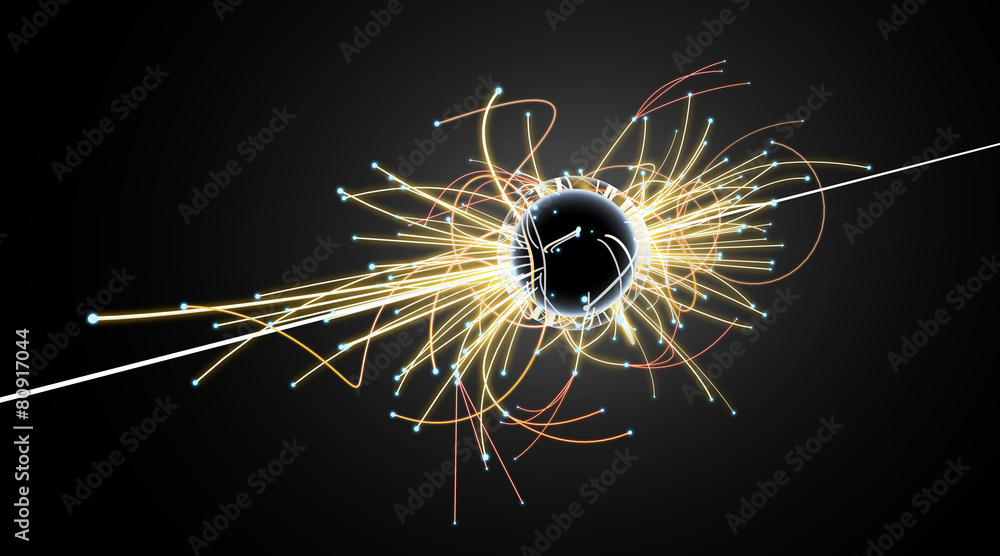

## 1. Introduction

1. Backstory
2. LHC at Work
3. Data
4. Project Objective

## 1.1. Backstory

**Particle accelerators.** To probe into the basic questions on how matter, space and time work and how they are structured, physicists focus on the simplest interactions (for example, collision of subatomic particles) at very high energy. Particle accelerators enable physicists to explore the fundamental nature of matter by observing subatomic particles produced by high-energy collisions of particle beams. The experimental measurements from these collisions inevitably lack precision, which is where machine learning (ML) comes into picture. The research community typically relies on standardized machine learning software packages for the analysis of the data obtained from such experiments and spends a huge amount of effort towards improving statistical power by extracting features of significance, derived from the raw measurements.

**Higgs boson.** The Higgs boson particle, also called the God particle in mainstream media, is the final ingredient of the standard model of particle physics, which sets the rules for the subatomic particles and forces. The elementary particles are supposed to be massless at very high energies, but some of them can acquire mass at low-energies. The mechanism of this acquiring remained an enigma in theoretical physics for a long time. In
, Peter Higgs and others proposed a mechanism that theoretically explains the origin of mass of elementary particles. The mechanism involves a field, commonly known as Higgs field, that the paricles can interact with to gain mass. The more a particle interacts with it, the heavier it is. Some particles, like photon, do not interact with this field at all and remain massless. The Higgs boson particle is the associated particle of the Higgs field (all fundamental fields have one). It is essentially the physical manifestation of the Higgs field, which gives mass to other particles. The detection of this elusive particle waited almost half a century since its theorization!

**The discovery.** On 4th July 2012, the ATLAS and CMS experiments at CERN's Large Hadron Collider announced that both of them had observed a new particle in the mass region around 125 GeV. This particle is consistent with the theorized Higgs boson. This experimental confirmation earned François Englert and Peter Higgs The Nobel Prize in Physics 2013

**Giving mass to fermions.** There are many different processes through which the Higgs boson can decay and produce other particles. In physics, the possible transformations a particle can undergo as it decays are referred to as channels. The Higgs boson has been observed first to decay in three distinct decay channels, all of which are boson pairs. To establish that the Higgs field provides the interaction which gives mass to the fundamental fermions (particles which follow the Fermi-Dirac statistics, contrary to the bosons which follow the Bose-Einstein statistics) as well, it has to be demonstrated that the Higgs boson can decay into fermion pairs through direct decay modes. Subsequently, to seek evidence on the decay of Higgs boson into fermion pairs (such as tau leptons
 or b-quarks) and to precisely measure their characteristics became one of the important lines of enquiry. Among the available modes, the most promising is the decay to a pair of tau leptons, which balances a modest branching ratio with manageable backgrounds.

 **The first evidence of
 decays was recently reported, based on the full set of proton–proton collision data recorded by the ATLAS experiment at the LHC during 2011-2012.Despite the consistency of the data with
 decays, it could not be ensured that the statistical power exceeds the
 threshold, which is the required standard for claims of discovery in high-energy physics community.**

## 1.2. Large Hadron Collider

**Proton-proton collisions.** In particle physics, an event refers to the results just after a fundamental interaction took place between subatomic particles, occurring in a very short time span, at a well-localized region of space. In the LHC, swarms of protons are accelerated on a circular trajectory in both directions, at an extremely high speed. These swarms are made to cross in the ATLAS detector, causing hundreds of millions of proton-proton collisions per second. The resulting events are detected by sensors, producing a sparse vector of about a hundred thousand dimensions (roughly corresponding to an image or speech signal in classical machine learning applications). The feature construction phase involves extracting type, energy, as well as
-D direction of each particle from the raw data. Also, the variable-length list of four-tuples is digested into a fixed-length vector of features containing up to tens of real-valued variables.

**Background events, signal events and selection region.** Some of these variables are first used in a real-time multi-stage cascade classifier (called the trigger) to discard most of the uninteresting events (called background events). The selected events (roughly four hundred per second) are then written on disks by a large CPU farm, producing petabytes of data per year. The saved events still, in large majority, represent known processes (these are also background events). The background events are mostly produced by the decay of particles which, though exotic in nature, are known beforehand from previous generations of experiments. The goal of the offline analysis is to find a region (called selection region) in the feature space that produces significantly excess of events (called signal events) compared to what known background processes can explain. Once the region has been fixed, a statistical test is applied to determine the significance of the excess. If the probability that the excess has been produced by background processes falls below a certain limit, it indicates the discovery of a new particle.

**The classification problem.** To optimize the selection region, multivariate classification techniques are routinely utilized. The formal objective function is unique and somewhat different from the classification error or other objectives that are used regularly in machine learning. Nevertheless, finding a pure signal region corresponds roughly to separating background events and signal events, which is a standard classification problem. Consequently, established classification methods are useful, as they provide better discovery sensitivity than traditional, manual techniques.

**Weighting and normalization.** The classifier is trained on simulated background events and signal events. Simulators produce weights for each event to correct for the mismatch between the prior probability of the event and the instrumental probability applied by the simulator. The weights are normalized such that in any region, the sum of the weights of events falling in the region gives an unbiased estimate of the expected number of events found there for a fixed integrated luminosity, which corresponds to a fixed data taking time for a given beam intensity. In this case, it corresponds to the data collected by the **ATLAS experiment in 2012** Since the probability of a signal event is usually several orders of magnitudes lower than the probability of a background event, the signal samples and the background samples are usually renormalized to produce a balanced classification problem. A real-valued discriminant function is then trained on this reweighted sample to minimize the weighted classification error. The signal region is then defined by cutting the discriminant value at a certain threshold, which is optimized on a held-out set to maximize the sensitivity of the statistical test.

**The broad goal is to improve the procedure that produces the selection region, i.e. the region (not necessarily connected) in the feature space which produces signal events.**

## 1.3. Project Objective

**IN THE FIELD OF PARTICLE PHYSICS, ACCURATE IDENTIFICATION AND CLASSIFICATION OF EVENTS ARE CRUCIAL FOR UNDERSTANDING FUNDAMENTAL PARTICLES AND THEIR INTERACTIONS. THE PROVIDED DATASET CONTAINS VARIOUS FEATURES DERIVED FROM PARTICLE PHYSICS EXPERIMENTS, AND THE GOAL IS TO BUILD A MACHINE-LEARNING MODEL TO CLASSIFY EVENTS INTO SIGNAL (s) AND BACKGROUND (b) CATEGORIES. THIS CLASSIFICATION AIDS IN DISTINGUISHING EVENTS OF INTEREST (SIGNAL) FROM BACKGROUND NOISE.**

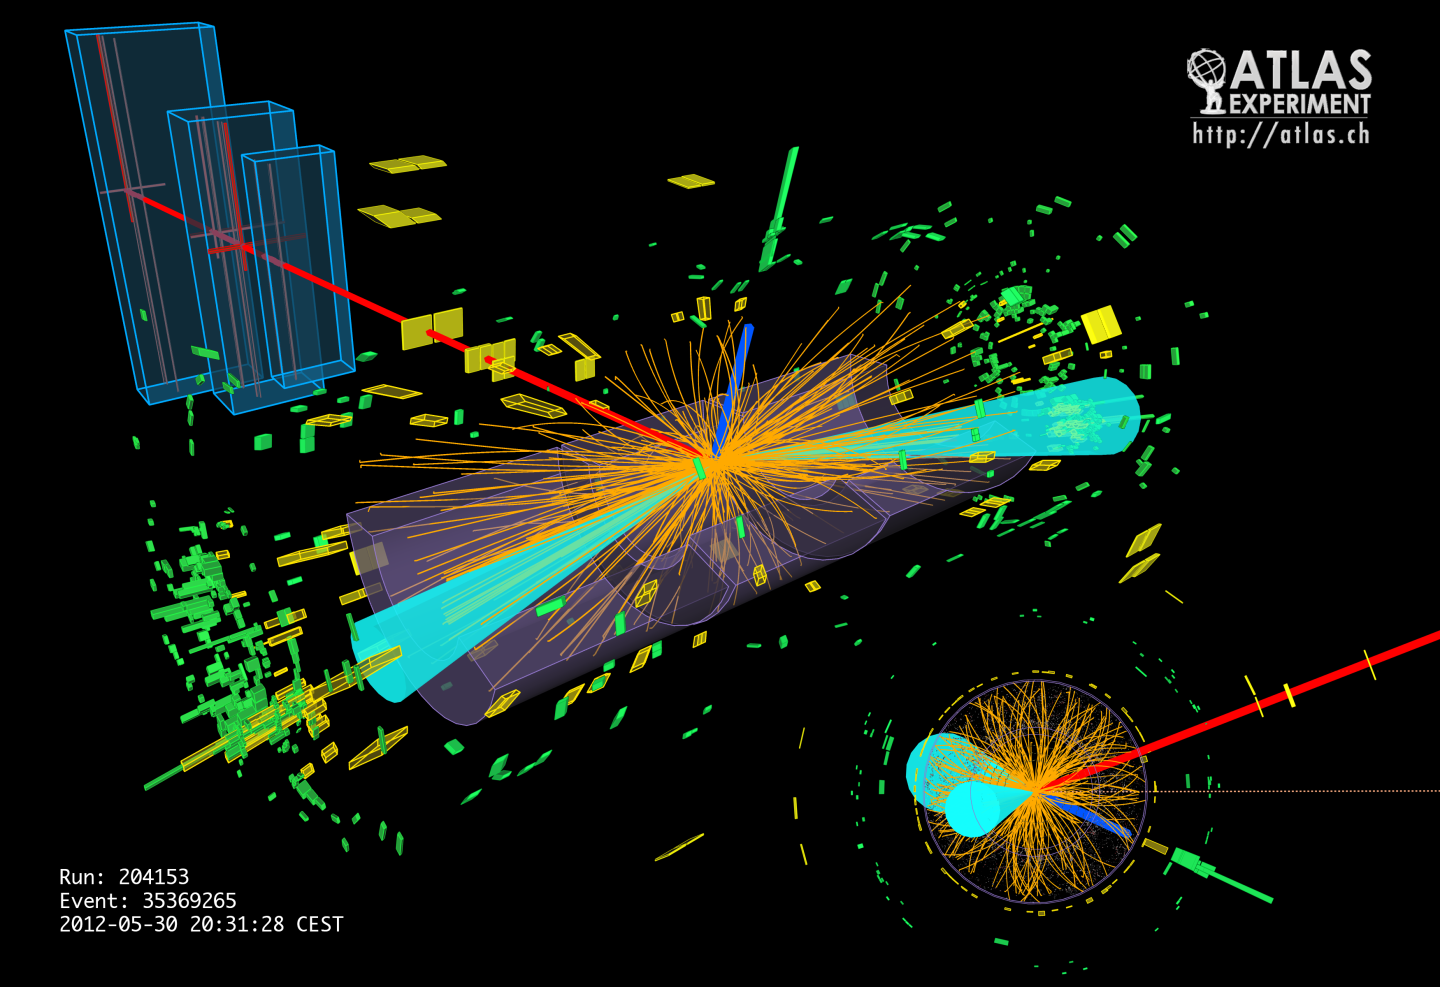

## 1.4 Goal

**The primary goal of this machine learning project is to develop a model that can accurately predict whether a given set of experimental features corresponds to a signal or background event. Successful classification contributes to the advancement of particle physics research by automating the identification of events that may indicate the presence of specific particles or phenomena.**


## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the Dataset

In [2]:
data = pd.read_csv('Data.csv')

In [3]:
data.shape

(250000, 33)

In [4]:
data.head()

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3                  9.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...            2              67.435   
1               3.473       2.078  ...            1              46.226   
2               3.148       9.336  ...            1              44.251   
3               3.310       0.414  ...            0            -999.000   
4               3.891      16.405  ...            0            -999.000   

   PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
0                2.150                0.444                 46.062   
1                0.725                1.158               -999.000   
2                2.053               -2.028               -999.000   
3             -999.000             -999.000               -999.000   
4             -999.000             -999.000               -999.000   

   PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  \
0                    1.24                  -2.475         113.497  0.002653   
1                 -999.00                -999.000          46.226  2.233584   
2                 -999.00                -999.000          44.251  2.347389   
3                 -999.00                -999.000           0.000  5.446378   
4                 -999.00                -999.000           0.000  6.245333   

   Label  
0      s  
1      b  
2      b  
3      b  
4      b  

[5 rows x 33 columns]

In [5]:
data.tail()

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  \
249995   349995      -999.000                       71.989        36.548   
249996   349996      -999.000                       58.179        68.083   
249997   349997       105.457                       60.526        75.839   
249998   349998        94.951                       19.362        68.812   
249999   349999      -999.000                       72.756        70.831   

        DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
249995     5.042                -999.0            -999.0               -999.0   
249996    22.439                -999.0            -999.0               -999.0   
249997    39.757                -999.0            -999.0               -999.0   
249998    13.504                -999.0            -999.0               -999.0   
249999     7.479                -999.0            -999.0               -999.0   

        DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
249995               1.392       5.042  ...            0            -999.000   
249996               2.585      22.439  ...            0            -999.000   
249997               2.390      22.183  ...            1              41.992   
249998               3.365      13.504  ...            0            -999.000   
249999               2.025       7.479  ...            0            -999.000   

        PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
249995               -999.0             -999.000                 -999.0   
249996               -999.0             -999.000                 -999.0   
249997                  1.8               -0.166                 -999.0   
249998               -999.0             -999.000                 -999.0   
249999               -999.0             -999.000                 -999.0   

        PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt  \
249995                  -999.0                  -999.0           0.000   
249996                  -999.0                  -999.0           0.000   
249997                  -999.0                  -999.0          41.992   
249998                  -999.0                  -999.0           0.000   
249999                  -999.0                  -999.0           0.000   

          Weight  Label  
249995  4.505083      b  
249996  2.497259      b  
249997  0.018636      s  
249998  1.681611      b  
249999  1.877474      b  

[5 rows x 33 columns]

In [6]:
#typical observation from the data
data.loc[0,data.columns]

EventId                          100000
DER_mass_MMC                     138.47
DER_mass_transverse_met_lep      51.655
DER_mass_vis                     97.827
DER_pt_h                          27.98
DER_deltaeta_jet_jet               0.91
DER_mass_jet_jet                124.711
DER_prodeta_jet_jet               2.666
DER_deltar_tau_lep                3.064
DER_pt_tot                       41.928
DER_sum_pt                       197.76
DER_pt_ratio_lep_tau              1.582
DER_met_phi_centrality            1.396
DER_lep_eta_centrality              0.2
PRI_tau_pt                       32.638
PRI_tau_eta                       1.017
PRI_tau_phi                       0.381
PRI_lep_pt                       51.626
PRI_lep_eta                       2.273
PRI_lep_phi                      -2.414
PRI_met                          16.824
PRI_met_phi                      -0.277
PRI_met_sumet                   258.733
PRI_jet_num                           2
PRI_jet_leading_pt               67.435


## 2. Basic Data Exploration

In [7]:
print('Shape of the data is : ',data.shape)
print('Total numbers of rows in Data : ',data.shape[0])
print('Total numbers of column in Data : ',data.shape[1])


Shape of the data is :  (250000, 33)
Total numbers of rows in Data :  250000
Total numbers of column in Data :  33


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [9]:
#count of column data type
col_dtype = {}
float_col = len(data.select_dtypes(include = 'float64').columns)
col_dtype['float'] = float_col

int_col = len(data.select_dtypes(include = 'int64').columns)
col_dtype['int'] = int_col

object_col = len(data.select_dtypes(include = 'object').columns)
col_dtype['object'] = object_col

df_dtype = pd.DataFrame(col_dtype,index = ['Number of columns'])
df_dtype

float  int  object
Number of columns     30    2       1

In [10]:
#integers column in dataset
data.select_dtypes(include = ['int64']).columns

Index(['EventId', 'PRI_jet_num'], dtype='object')

In [11]:
#objects column in dataset
data.select_dtypes(include = ['object']).columns

Index(['Label'], dtype='object')

## 2.1 Checking Duplicate rows

In [12]:
#checking duplicate values
def drop_duplicates(df):
    if df.duplicated().any() == True:
        print("The total number of duplicated values before removing : ",df.duplicated().sum())
        df.drop_duplicates(inplace = True,keep = 'last')
        df = df.reset_index(drop = True)
        print('The total number of duplicated values after removing : ',df.duplicated().sum())

    else:
        print('No Duplicate entries found in Dataset')

In [13]:
drop_duplicates(data)

No Duplicate entries found in Dataset


## 2.2 Checking Null Values

In [14]:
def check_null(df):
    if df.isnull().sum().sum() > 0 :
        print('Total number of null values in dataset : ',df.isnull().sum().sum())
    else:
        print('No null values found in dataset!!!')
check_null(data)

No null values found in dataset!!!


In [15]:
#checking count of null values in each column
data.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [16]:
#checking constant columns
def check_constant(df):
    if len(df.nunique()[df.nunique() == 1]) > 0:
        print('Dataset contains the  constant columns.')
        print('List of constant columns : ',data.nunique()[data.nunique() == 1].index)
    else:
        print('No Constant Columns Found In Dataset!!!')

check_constant(data)

No Constant Columns Found In Dataset!!!


In [17]:
data.nunique()[data.nunique() > 2].index

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight'],
      dtype='object')

## 2.3 Descriptive Stats

In [18]:
# Statistical description of numerical variables in the data set
desc = data.describe().iloc[1:,:].T
desc


mean           std            min  \
EventId                      224999.500000  72168.927986  100000.000000   
DER_mass_MMC                    -49.023079    406.345647    -999.000000   
DER_mass_transverse_met_lep      49.239819     35.344886       0.000000   
DER_mass_vis                     81.181982     40.828691       6.329000   
DER_pt_h                         57.895962     63.655682       0.000000   
DER_deltaeta_jet_jet           -708.416643    454.482458    -999.000000   
DER_mass_jet_jet               -601.237051    657.972302    -999.000000   
DER_prodeta_jet_jet            -709.356603    453.019877    -999.000000   
DER_deltar_tau_lep                2.373100      0.782911       0.208000   
DER_pt_tot                       18.917332     22.273494       0.000000   
DER_sum_pt                      158.432217    115.706115      46.104000   
DER_pt_ratio_lep_tau              1.437609      0.844743       0.047000   
DER_met_phi_centrality           -0.128305      1.193585      -1.414000   
DER_lep_eta_centrality         -708.985189    453.596721    -999.000000   
PRI_tau_pt                       38.707419     22.412081      20.000000   
PRI_tau_eta                      -0.010973      1.214079      -2.499000   
PRI_tau_phi                      -0.008171      1.816763      -3.142000   
PRI_lep_pt                       46.660207     22.064922      26.000000   
PRI_lep_eta                      -0.019507      1.264982      -2.505000   
PRI_lep_phi                       0.043543      1.816611      -3.142000   
PRI_met                          41.717235     32.894693       0.109000   
PRI_met_phi                      -0.010119      1.812223      -3.142000   
PRI_met_sumet                   209.797178    126.499506      13.678000   
PRI_jet_num                       0.979176      0.977426       0.000000   
PRI_jet_leading_pt             -348.329567    532.962789    -999.000000   
PRI_jet_leading_eta            -399.254314    489.338286    -999.000000   
PRI_jet_leading_phi            -399.259788    489.333883    -999.000000   
PRI_jet_subleading_pt          -692.381204    479.875496    -999.000000   
PRI_jet_subleading_eta         -709.121609    453.384624    -999.000000   
PRI_jet_subleading_phi         -709.118631    453.389017    -999.000000   
PRI_jet_all_pt                   73.064591     98.015662       0.000000   
Weight                            1.646767      1.875103       0.001502   

                                       25%            50%            75%  \
EventId                      162499.750000  224999.500000  287499.250000   
DER_mass_MMC                     78.100750     105.012000     130.606250   
DER_mass_transverse_met_lep      19.241000      46.524000      73.598000   
DER_mass_vis                     59.388750      73.752000      92.259000   
DER_pt_h                         14.068750      38.467500      79.169000   
DER_deltaeta_jet_jet           -999.000000    -999.000000       0.490000   
DER_mass_jet_jet               -999.000000    -999.000000      83.446000   
DER_prodeta_jet_jet            -999.000000    -999.000000      -4.593000   
DER_deltar_tau_lep                1.810000       2.491500       2.961000   
DER_pt_tot                        2.841000      12.315500      27.591000   
DER_sum_pt                       77.550000     120.664500     200.478250   
DER_pt_ratio_lep_tau              0.883000       1.280000       1.777000   
DER_met_phi_centrality           -1.371000      -0.356000       1.225000   
DER_lep_eta_centrality         -999.000000    -999.000000       0.000000   
PRI_tau_pt                       24.591750      31.804000      45.017000   
PRI_tau_eta                      -0.925000      -0.023000       0.898000   
PRI_tau_phi                      -1.575000      -0.033000       1.565000   
PRI_lep_pt                       32.375000      40.516000      53.390000   
PRI_lep_eta                      -1.014000      -0.045000       0.959000   
PRI_lep_phi                      -1.522000

In [19]:
#Statistical description of objectl variables in the data set
data.describe(include = ['O'])

Label
count   250000
unique       2
top          b
freq    164333

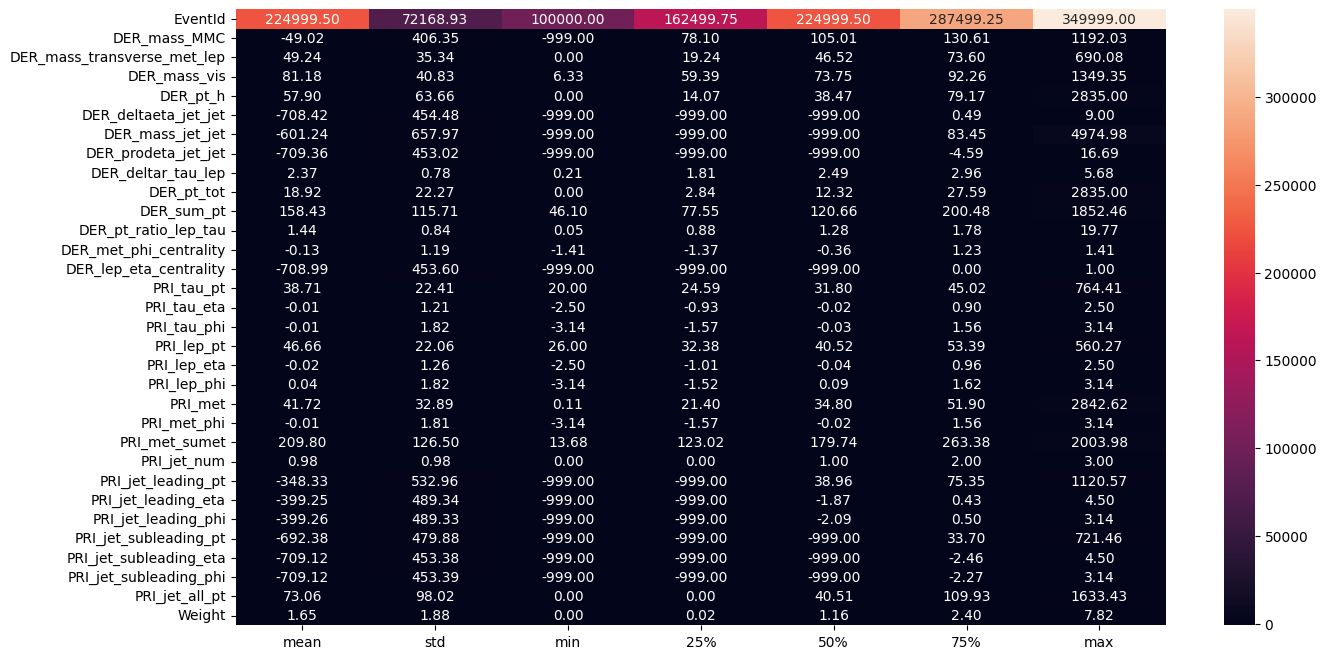

In [20]:
plt.figure(figsize = (15,8))
sns.heatmap(desc,annot = True,fmt = '.2f')
plt.show()

**Dataset Synopsis**

* Number Of Observation - 250000
* Number of Columns - 33
* Number of float columns - 30
* Number of integer columns - 2
* Number of object columns - 1
* Number of constant columns -None
* Number of Duplicate Observation - 0
* Number of missing values in dataset -0


## 3. Univariate Analysis

### 3.1 Target Variable

The target **Label** is a binary variable, taking values **b** and **s**, indicating the status of an event.'b' indicates **'Background'** and 's' indicates **'Signal'.**

In [21]:
#count the values in each class
data['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

In [22]:
#count the percentage of the values in each class
np.round(data['Label'].value_counts(normalize = True)*100,2)

b    65.73
s    34.27
Name: Label, dtype: float64

In [23]:
import plotly.express as px

In [24]:
def pie_chart(df,col):
    values = df[col].value_counts().values
    fig = px.pie(df,values=values, names=['Background','Signal'], color_discrete_sequence=px.colors.sequential.RdBu,title = 'Distribution Of Target Column')
    fig.update_layout(height=600, width=800)
    fig.show()

In [25]:
pie_chart(data,'Label')

In [26]:
fig = px.bar(data,x = ['Background','Signal'],y =data['Label'].value_counts().values,title="Distribution of Target Column")
fig.show()

In [27]:
#spliting the data by class
data_b = data[data['Label'] == 'b'] # Background events in the training set
data_s = data[data['Label'] == 's'] # System events in the training set

## 3.2 Preditor Variable

In [28]:
#Number of unique values for the predictor variables
df_unique = pd.DataFrame()
df_unique['Background Event'] = data_b.nunique().values[:-1]
df_unique['Signal Event'] = data_s.nunique().values[:-1]
df_unique['All_Events(Signal and Background)'] = data.nunique().values[:-1]
df_unique.index = data.columns[:-1]
print("----------------Number of unique values for the predictor variables------------------------------")
print("            ")
df_unique


----------------Number of unique values for the predictor variables------------------------------
            


Background Event  Signal Event  \
EventId                                164333         85667   
DER_mass_MMC                            85521         51645   
DER_mass_transverse_met_lep             87812         50941   
DER_mass_vis                            88377         48615   
DER_pt_h                                84305         64625   
DER_deltaeta_jet_jet                     5625          6989   
DER_mass_jet_jet                        38310         31880   
DER_prodeta_jet_jet                     11605         13627   
DER_deltar_tau_lep                       4688          3399   
DER_pt_tot                              50605         36604   
DER_sum_pt                             111718         73782   
DER_pt_ratio_lep_tau                     5575          4505   
DER_met_phi_centrality                   2829          2822   
DER_lep_eta_centrality                   1002          1002   
PRI_tau_pt                              44586         45473   
PRI_tau_eta                              4971          4930   
PRI_tau_phi                              6285          6284   
PRI_lep_pt                              54293         39477   
PRI_lep_eta                              4984          4950   
PRI_lep_phi                              6285          6285   
PRI_met                                 71338         54952   
PRI_met_phi                              6284          6285   
PRI_met_sumet                          129339         76382   
PRI_jet_num                                 4             4   
PRI_jet_leading_pt                      59670         48421   
PRI_jet_leading_eta                      8033          8290   
PRI_jet_leading_phi                      6285          6285   
PRI_jet_subleading_pt                   28737         24730   
PRI_jet_subleading_eta                   7783          8337   
PRI_jet_subleading_phi                   6275          6249   
PRI_jet_all_pt                          68026         52400   
Weight                                 104090             4   

                             All_Events(Signal and Background)  
EventId                                                 250000  
DER_mass_MMC                                            108338  
DER_mass_transverse_met_lep                             101637  
DER_mass_vis                                            100558  
DER_pt_h                                                115563  
DER_deltaeta_jet_jet                                      7088  
DER_mass_jet_jet                                         68366  
DER_prodeta_jet_jet                                      16593  
DER_deltar_tau_lep                                        4692  
DER_pt_tot                                               59042  
DER_sum_pt                                              156098  
DER_pt_ratio_lep_tau                                      5931  
DER_met_phi_centrality                                    2829  
DER_lep_eta_centrality                                    1002  
PRI_tau_pt                                               59639  
PRI_tau_eta                                               4971  
PRI_tau_phi                                               6285  
PRI_lep_pt                                               61929  
PRI_lep_eta                                               4987  
PRI_lep_phi                                               6285  
PRI_met                                                  87836  
PRI_met_phi                                               6285  
PRI_met_sumet                                           179740  
PRI_jet_num                                                  4  
PRI_jet_leading_pt                                       86590  
PRI_jet_leading_eta                                       8558  
PRI_jet_leading_phi                                       6285  
PRI_jet_subleading_pt                                    42464  
PRI_jet_subleading_eta                                    8628  

In [29]:
#Proportion of values of each column
for i in data.columns[1:]:
    print(i)
    print('='*10)
    print(data[i].value_counts(normalize = True)*100)
    print('='*10)

DER_mass_MMC
-999.000    15.2456
 108.914     0.0040
 96.819      0.0040
 103.762     0.0040
 108.957     0.0040
             ...   
 47.910      0.0004
 274.769     0.0004
 191.831     0.0004
 200.830     0.0004
 217.020     0.0004
Name: DER_mass_MMC, Length: 108338, dtype: float64
DER_mass_transverse_met_lep
1.800      0.0052
9.362      0.0048
3.501      0.0048
2.500      0.0048
3.183      0.0048
            ...  
20.637     0.0004
126.732    0.0004
18.280     0.0004
71.255     0.0004
19.362     0.0004
Name: DER_mass_transverse_met_lep, Length: 101637, dtype: float64
DER_mass_vis
76.819     0.0064
61.286     0.0060
70.412     0.0056
76.629     0.0052
71.097     0.0052
            ...  
110.242    0.0004
431.917    0.0004
194.393    0.0004
107.121    0.0004
75.839     0.0004
Name: DER_mass_vis, Length: 100558, dtype: float64
DER_pt_h
0.000      0.0164
1.843      0.0100
0.697      0.0100
0.778      0.0100
1.308      0.0100
            ...  
63.439     0.0004
317.840    0.0004
204.565  

**After looking at the count of values in each column we came across with the value -999.000.As per documentation of dataset,these variables are meaningless or cannot be computed,which is outside the normal range of all variables.Lets take a look at column which has -999.000 values and their propration in particular column**

In [30]:
index_999 = [col for col in data.columns if -999.000 in data[col].value_counts().index]
def minus_999(df):
    data = [df[col].value_counts(normalize = True)[-999.000] for col in index_999]
    return pd.Series(data = data,index = index_999).sort_values(ascending = False)
df_minus_999 = pd.DataFrame()
df_minus_999['Background Event'] = minus_999(data_b)
df_minus_999['Signal Event'] = minus_999(data_s)
df_minus_999['All Events'] = minus_999(data)
df_minus_999.index = index_999
print("-------------------Proportion of the value -999 in the dataset columns.-------------------------------------")
#print("                                                                       ")
df_minus_999

-------------------Proportion of the value -999 in the dataset columns.-------------------------------------


Background Event  Signal Event  All Events
DER_mass_MMC                    0.756117      0.621033    0.709828
DER_deltaeta_jet_jet            0.756117      0.621033    0.709828
DER_mass_jet_jet                0.756117      0.621033    0.709828
DER_prodeta_jet_jet             0.756117      0.621033    0.709828
DER_lep_eta_centrality          0.756117      0.621033    0.709828
PRI_jet_leading_pt              0.756117      0.621033    0.709828
PRI_jet_leading_eta             0.756111      0.621033    0.709824
PRI_jet_leading_phi             0.452867      0.297571    0.399652
PRI_jet_subleading_pt           0.452867      0.297571    0.399652
PRI_jet_subleading_eta          0.452867      0.297571    0.399652
PRI_jet_subleading_phi          0.214680      0.033093    0.152456

## Float features

### Comparison of feature distributions by target class in the Data

Next we compare the distribution of the features with Background event and signal event in the data.**If a feature has resonably diffrent distribution corresponding to the background event and signal event,then it is clear indication that the feature is important in the task of classifying the events when the label is unknown.** Similarly, if a feature has very similar distributions for the two target classes, then it is unlikely to help in the classification problem based on the feature alone.

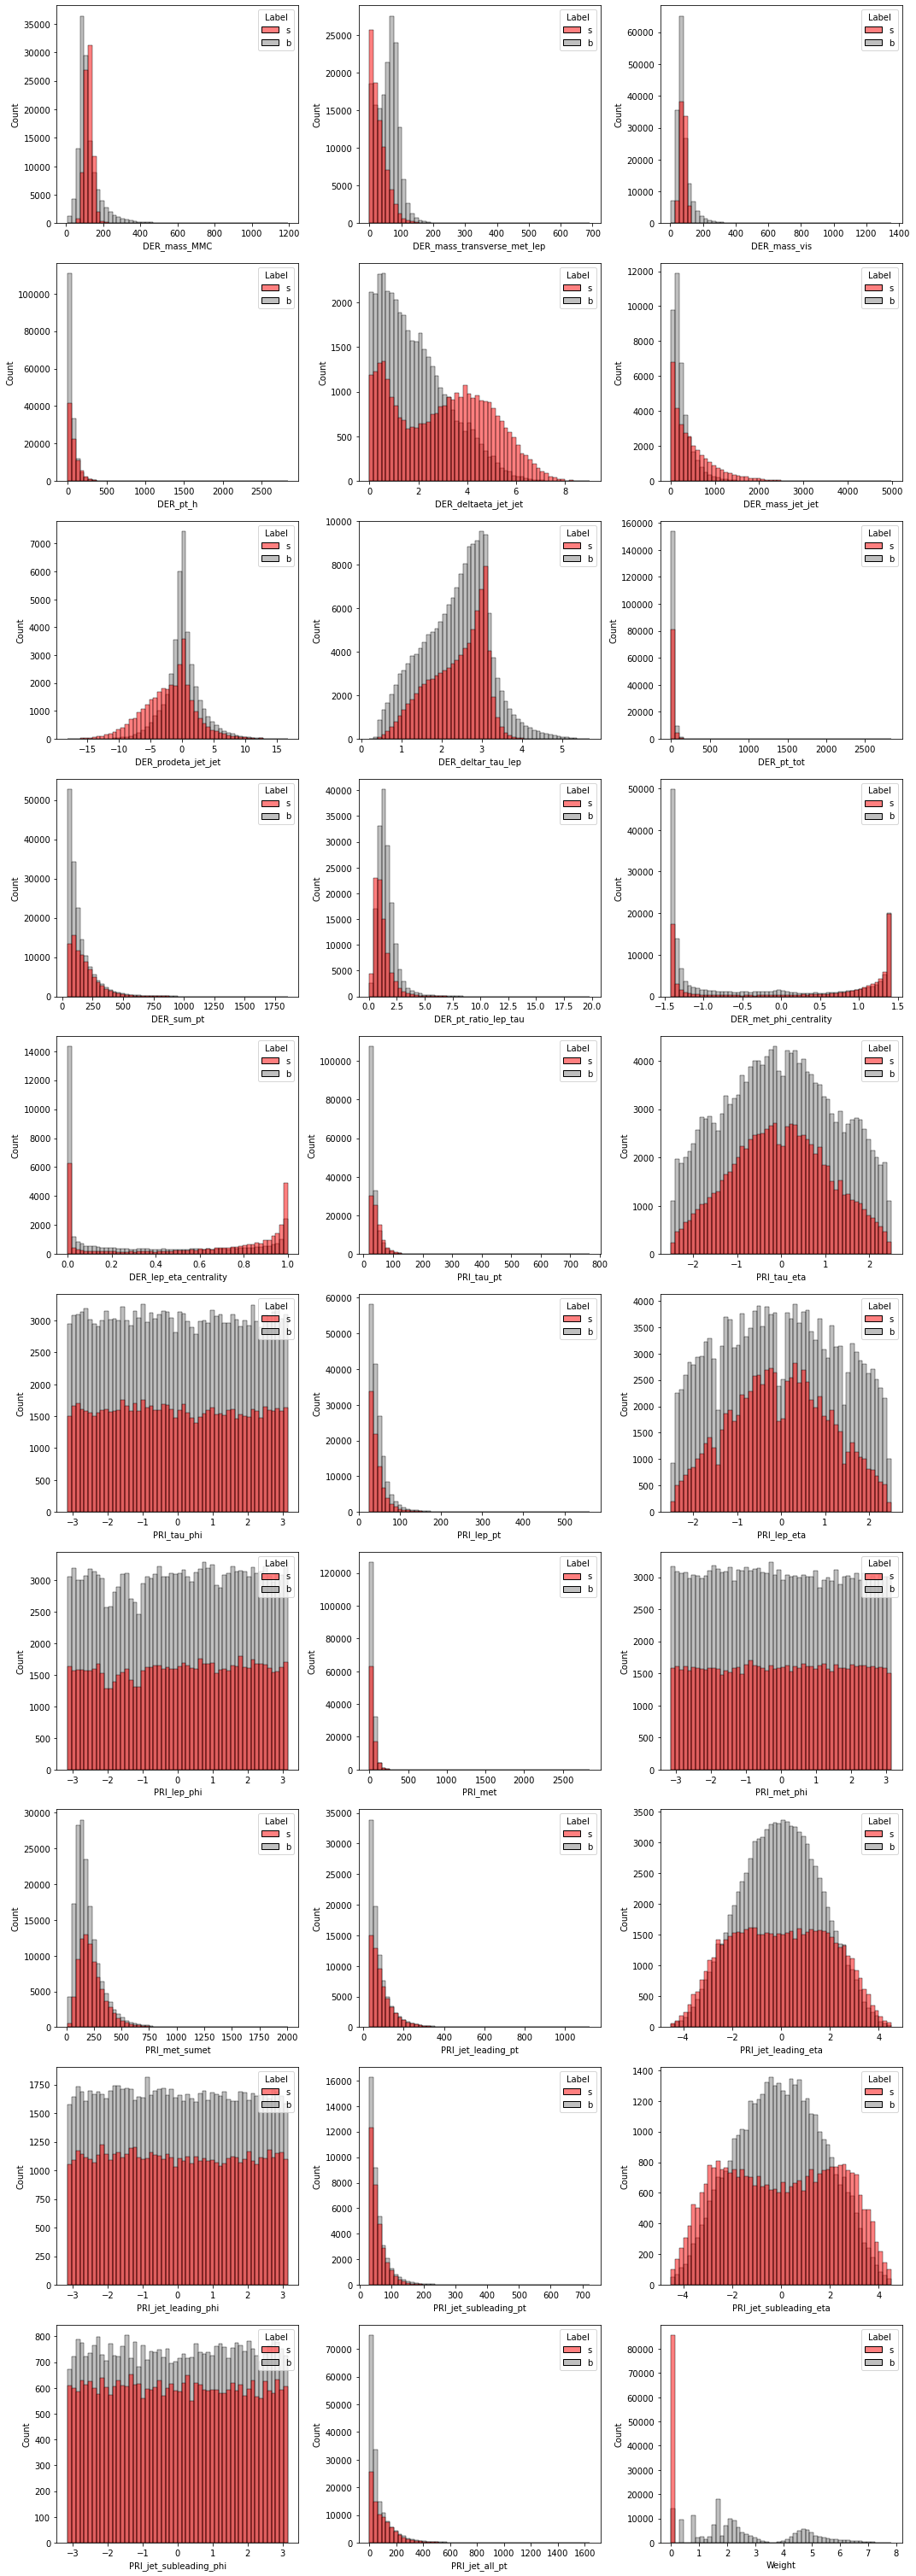

In [ ]:
plt.figure(figsize = (15, 4.2 * 10))
dummy = data.replace(-999, np.nan)
cols = list(data.columns[data.dtypes == 'float64'])
for i in range(len(data.columns[data.dtypes == 'float64'])):
    plt.subplot(10,3,i+1)
    sns.histplot(data = data.replace(-999, np.nan), x = cols[i], bins = 54, hue = 'Label', palette = ['red', 'grey'])
plt.tight_layout()
plt.show()

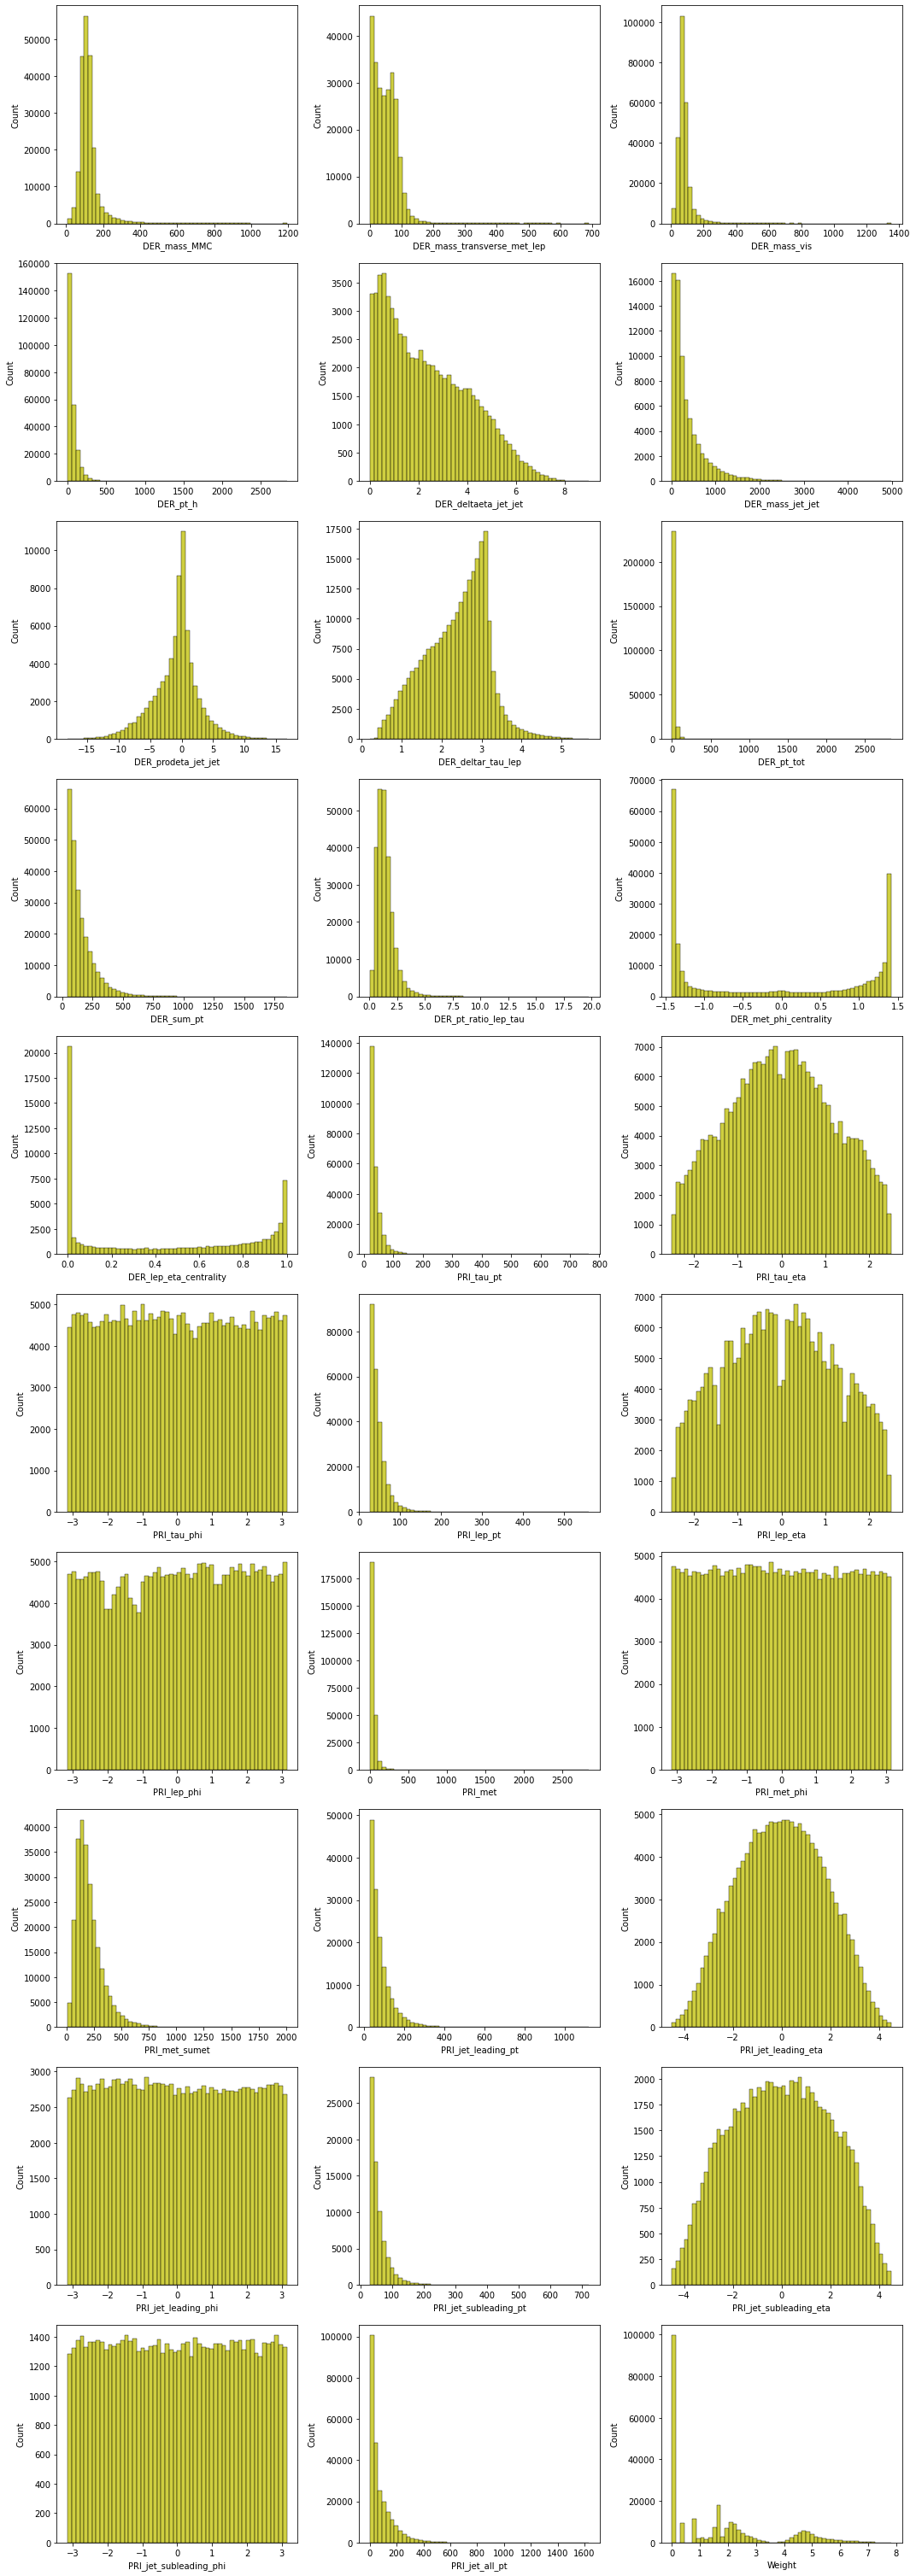

In [ ]:
plt.figure(figsize = (15, 4.2 * 10))
dummy = data.replace(-999, np.nan)
cols = list(data.columns[data.dtypes == 'float64'])
for i in range(len(data.columns[data.dtypes == 'float64'])):
    plt.subplot(10,3,i+1)
    sns.histplot(data = data.replace(-999, np.nan), x = cols[i], bins = 54,color = 'y')
plt.tight_layout()
plt.show()

## Skewness

**Skewness** is a statistical measure that assesses the asymmetry of a probability distribution. It quantifies the extent to which the data is skewed or shifted to one side.

**Positive skewness** indicates a longer tail on the right side of the distribution, while **Negative skewness** indicates a longer tail on the left side. Skewness helps in understanding the shape and outliers in a dataset.

**We are going to take a look at the skewness of the columns in our data and will try to classify it as extreme skewness,high skewness and moderate skewness**

**Thumb Rule For Skewness** -
* For skewness values between -0.5 and 0.5, the data exhibit approximate symmetry.
* Skewness values within the range of -1 and -0.5 (negative skewed) or 0.5 and 1(positive skewed) indicate slightly skewed    data distributions.
* Data with skewness values less than -1 (negative skewed) or greater than 1 (positive skewed) are considered highly          skewed.

In [31]:
#skewness of float features
df_skew = pd.DataFrame()
float_col = data.select_dtypes(include = ['float']).columns
skew_data_s = data_s.replace(-999,np.nan)[float_col].skew().values
skew_data_b = data_b.replace(-999,np.nan)[float_col].skew().values
skew_data_all = data.replace(-999,np.nan)[float_col].skew().values

df_skew['Signal_event'] = skew_data_s
df_skew['Background_event'] = skew_data_b
df_skew['All_events'] = skew_data_all
df_skew.index = float_col



In [ ]:
df_skew

Signal_event  Background_event  All_events
DER_mass_MMC                     5.409466          3.234194    3.807351
DER_mass_transverse_met_lep      2.687542          0.919176    1.219211
DER_mass_vis                     4.348492          3.344057    3.790262
DER_pt_h                         2.419227          2.444281    2.541885
DER_deltaeta_jet_jet             0.104843          0.790995    0.577506
DER_mass_jet_jet                 1.782598          2.673334    2.457852
DER_prodeta_jet_jet             -0.137686          0.215342   -0.328458
DER_deltar_tau_lep              -0.527265         -0.111639   -0.215782
DER_pt_tot                      22.143181          2.642732   10.579309
DER_sum_pt                       1.941645          2.641115    2.320647
DER_pt_ratio_lep_tau             2.744181          2.764701    2.633521
DER_met_phi_centrality          -0.569991          0.529246    0.151136
DER_lep_eta_centrality          -0.531894          0.561986    0.073373
PRI_tau_pt                       3.192828          4.505702    3.755191
PRI_tau_eta                      0.025709          0.014520    0.017852
PRI_tau_phi                      0.026947          0.007060    0.013872
PRI_lep_pt                       3.308831          3.211654    3.240762
PRI_lep_eta                      0.018339          0.023305    0.021623
PRI_lep_phi                     -0.055890         -0.040454   -0.045746
PRI_met                          6.584907          3.004432    5.270755
PRI_met_phi                     -0.011298          0.017921    0.007908
PRI_met_sumet                    1.626199          2.041613    1.849445
PRI_jet_leading_pt               2.370156          2.753206    2.564700
PRI_jet_leading_eta              0.006113         -0.007505    0.000151
PRI_jet_leading_phi              0.021091          0.013873    0.016784
PRI_jet_subleading_pt            2.423567          3.678547    3.394232
PRI_jet_subleading_eta          -0.004151         -0.008387   -0.005032
PRI_jet_subleading_phi           0.013524         -0.004456    0.003598
PRI_jet_all_pt                   1.731937          2.827340    2.379556
Weight                           0.500219          0.581062    0.990633

In [32]:
column_with_extreme_positive_skewness = df_skew[df_skew['All_events'] >3].index
column_with_high_positive_skewness = df_skew[(df_skew['All_events']>1) & (df_skew['All_events']<=3)].index
column_with_moderate_positive_skewness = df_skew[(df_skew['All_events']>0.5) & (df_skew['All_events']<=1)].index

In [33]:
print('Column with Extreme Positive Skewness : ', list(column_with_extreme_positive_skewness))
print('='*10)
print('Column with High Positive Skewness : ',list(column_with_high_positive_skewness))
print('='*10)
print('Column with Moderate Positive Skewness : ',list(column_with_moderate_positive_skewness))
print('='*10)

Column with Extreme Positive Skewness :  ['DER_mass_MMC', 'DER_mass_vis', 'DER_pt_tot', 'PRI_tau_pt', 'PRI_lep_pt', 'PRI_met', 'PRI_jet_subleading_pt']
Column with High Positive Skewness :  ['DER_mass_transverse_met_lep', 'DER_pt_h', 'DER_mass_jet_jet', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'PRI_met_sumet', 'PRI_jet_leading_pt', 'PRI_jet_all_pt']
Column with Moderate Positive Skewness :  ['DER_deltaeta_jet_jet', 'Weight']


**Observation -**
* Columns with Extreme Positive skewness : ['DER_mass_MMC', 'DER_mass_vis', 'DER_pt_tot', 'PRI_tau_pt', 'PRI_lep_pt', 'PRI_met', 'PRI_jet_subleading_pt']

* Column with High Positive Skewness :  ['DER_mass_transverse_met_lep', 'DER_pt_h', 'DER_mass_jet_jet', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'PRI_met_sumet', 'PRI_jet_leading_pt', 'PRI_jet_all_pt']

* Column with Moderate Positive Skewness :  ['DER_deltaeta_jet_jet', 'Weight']


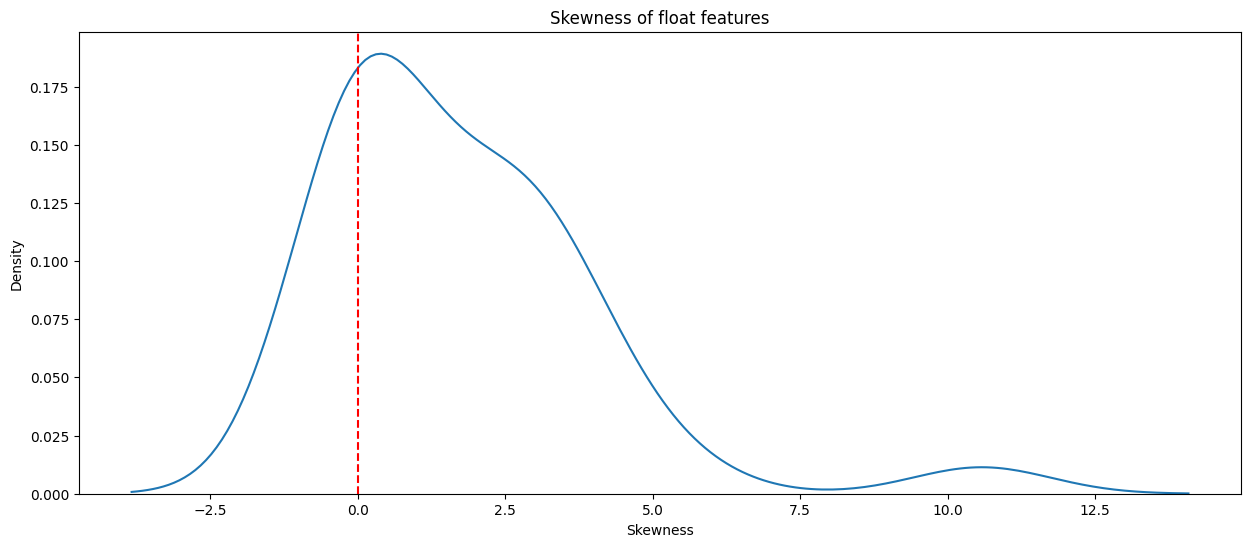

In [34]:
plt.figure(figsize = (15,6))
sns.kdeplot(data = df_skew, x = 'All_events')
plt.title('Skewness of float features')
plt.xlabel('Skewness')
plt.axvline(0.0,linestyle = '--',color = 'r')
plt.show()

**Observation -**
* The global peak of all event distribution is near zero.
* There is a mild peak near the 11 or 10 which indicates there are some float features which posseses high skewness.

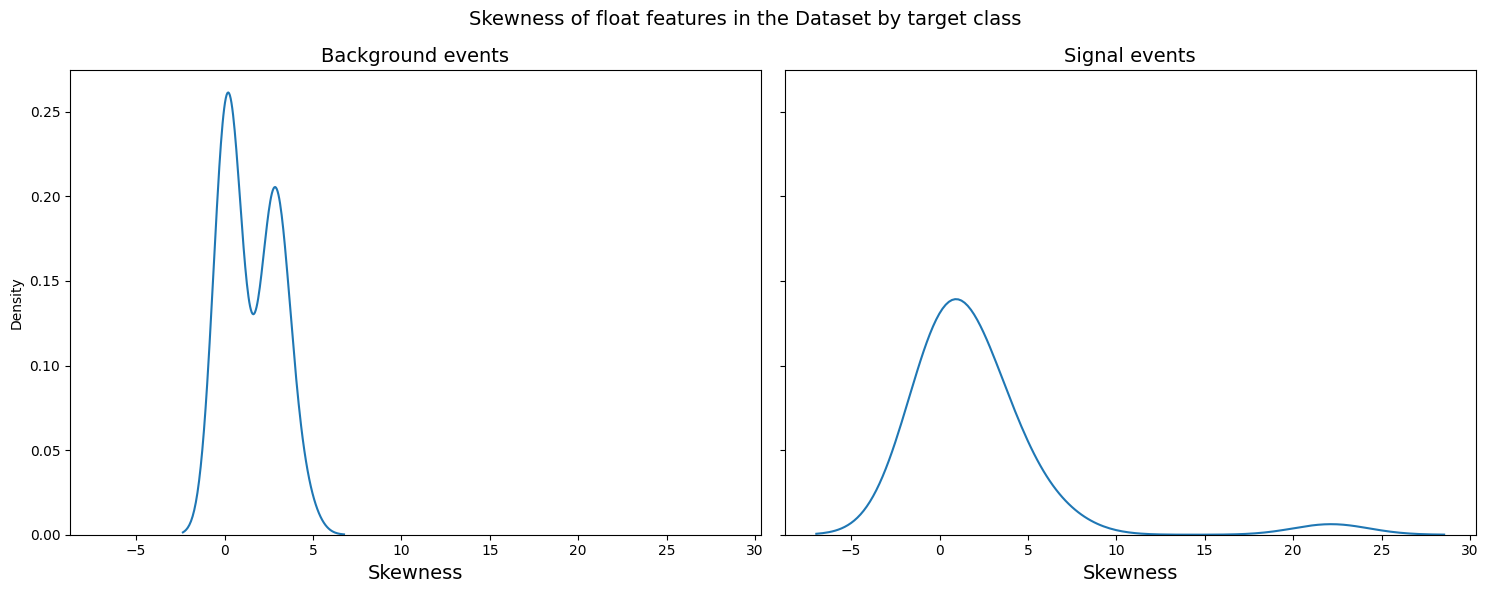

In [35]:
# Distribution of skewness of the float features in the training set by target class
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
sns.kdeplot(data = df_skew, x = 'Background_event', ax = ax[0])
sns.kdeplot(data = df_skew, x = 'Signal_event', ax = ax[1])
ax[0].set_title("Background events", fontsize = 14)
ax[0].set_xlabel("Skewness", fontsize = 14)
ax[1].set_title("Signal events", fontsize = 14)
ax[1].set_xlabel("Skewness", fontsize = 14)
plt.suptitle("Skewness of float features in the Dataset by target class", fontsize = 14)
plt.tight_layout()
plt.show()

**Observation -**
* The skewness distribution of both background and Signal event have global peak near 0.
* There is a mild peak far towards the right around 22 in the skewness distribution for the signal event indicating presence of float feature exhibits extremly high positive skewness.
* The skewness distribution for the background event has a clear bimodal structure.

## Integer Features

In [36]:
data['PRI_jet_num'].value_counts()

0    99913
1    77544
2    50379
3    22164
Name: PRI_jet_num, dtype: int64

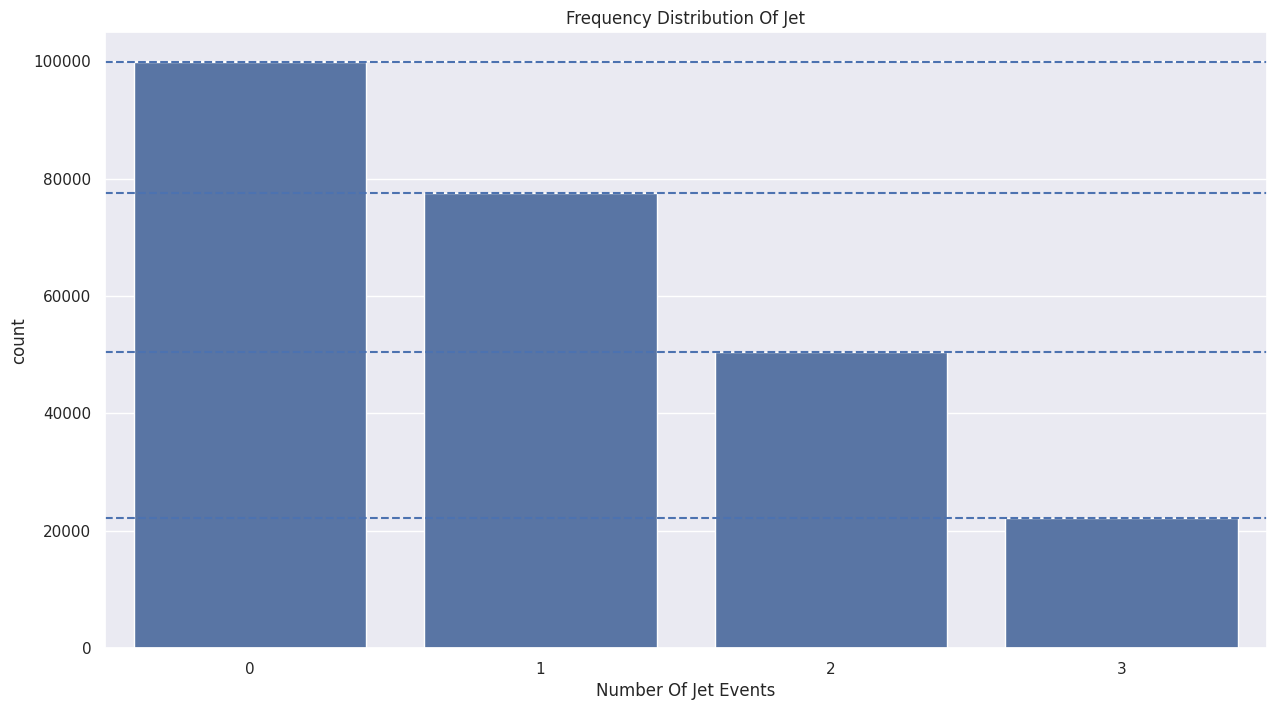

In [37]:
plt.figure(figsize = (15,8))
sns.set_theme(style = 'darkgrid')
sns.countplot(data = data,x = 'PRI_jet_num')
plt.axhline(data['PRI_jet_num'].value_counts().values[0],linestyle = '--')
plt.axhline(data['PRI_jet_num'].value_counts().values[1],linestyle = '--')
plt.axhline(data['PRI_jet_num'].value_counts().values[2],linestyle = '--')
plt.axhline(data['PRI_jet_num'].value_counts().values[3],linestyle = '--')
plt.title('Frequency Distribution Of Jet')
plt.xlabel('Number Of Jet Events')
plt.show()

In [38]:
plt.figure(figsize = (15,8))
sns.set_theme(style = 'darkgrid')
sns.countplot(data = data,x = 'PRI_jet_num',palette = "viridis",hue = 'Label')
#plt.axhline(df['target'].value_counts().values[0])
#plt.axhline(df['target'].value_counts().values[1])
plt.title('Frequency Distribution Of Jet by Labels')
plt.xlabel('Number Of Jet Events ')
plt.show()


In [39]:
fig = px.pie(data,values=data['PRI_jet_num'].value_counts(normalize = True).values*100, names=data['PRI_jet_num'].value_counts(normalize = True).index, color_discrete_sequence=px.colors.qualitative.G10,title = 'Frequency comparison of PRI_jet_num')
fig.update_layout(height=600, width=800)
fig.show()

# Multivariate Analysis

## Correlation structure of float features

In [40]:
#float features correlation
data.select_dtypes(include = ['float']).corr()

DER_mass_MMC  DER_mass_transverse_met_lep  \
DER_mass_MMC                     1.000000                    -0.455755   
DER_mass_transverse_met_lep     -0.455755                     1.000000   
DER_mass_vis                     0.168548                     0.190109   
DER_pt_h                         0.198765                    -0.249116   
DER_deltaeta_jet_jet             0.162664                    -0.176377   
DER_mass_jet_jet                 0.160524                    -0.190392   
DER_prodeta_jet_jet              0.162521                    -0.175942   
DER_deltar_tau_lep               0.228105                     0.043251   
DER_pt_tot                       0.045826                     0.017758   
DER_sum_pt                       0.201464                    -0.146837   
DER_pt_ratio_lep_tau            -0.017073                     0.349504   
DER_met_phi_centrality           0.358963                    -0.419757   
DER_lep_eta_centrality           0.162623                    -0.176262   
PRI_tau_pt                       0.131495                    -0.145464   
PRI_tau_eta                      0.002579                    -0.002109   
PRI_tau_phi                     -0.006177                     0.001132   
PRI_lep_pt                       0.099445                     0.310648   
PRI_lep_eta                      0.010060                    -0.006777   
PRI_lep_phi                     -0.000744                     0.000340   
PRI_met                         -0.233724                     0.183716   
PRI_met_phi                      0.007411                    -0.015925   
PRI_met_sumet                    0.221984                    -0.167811   
PRI_jet_leading_pt               0.250158                    -0.229674   
PRI_jet_leading_eta              0.247083                    -0.220370   
PRI_jet_leading_phi              0.247078                    -0.220355   
PRI_jet_subleading_pt            0.162836                    -0.176837   
PRI_jet_subleading_eta           0.162614                    -0.176231   
PRI_jet_subleading_phi           0.162609                    -0.176225   
PRI_jet_all_pt                   0.185372                    -0.210009   
Weight                          -0.327244                     0.419843   

                             DER_mass_vis  DER_pt_h  DER_deltaeta_jet_jet  \
DER_mass_MMC                     0.168548  0.198765              0.162664   
DER_mass_transverse_met_lep      0.190109 -0.249116             -0.176377   
DER_mass_vis                     1.000000 -0.062562             -0.032251   
DER_pt_h                        -0.062562  1.000000              0.523654   
DER_deltaeta_jet_jet            -0.032251  0.523654              1.000000   
DER_mass_jet_jet                -0.040620  0.534531              0.946035   
DER_prodeta_jet_jet             -0.032126  0.523639              0.999972   
DER_deltar_tau_lep               0.579712 -0.539379             -0.299064   
DER_pt_tot                      -0.000702  0.310501              0.270870   
DER_sum_pt                       0.088685  0.832733              0.671987   
DER_pt_ratio_lep_tau             0.097490  0.089187              0.041317   
DER_met_phi_centrality          -0.090846  0.539356              0.368482   
DER_lep_eta_centrality          -0.032220  0.523720              0.999989   
PRI_tau_pt                       0.290011  0.407421              0.188079   
PRI_tau_eta                      0.002127  0.001665              0.004854   
PRI_tau_phi                     -0.003624  0.005248              0.003302   
PRI_lep_pt                       0.405482  0.360939              0.168040   
PRI_lep_eta                      0.002196  0.008354              0.008674   
PRI_lep_phi                     -0.002018 -0.002923              0.000054   
PRI_met                         -0.087330  0.679585              0.305557   
PRI_met_phi                     -0.001467  0.008585              0.005245   
PRI_met_sumet                    0.05330

In [41]:
print('Correlation Matrix of Background Event')
data_b.select_dtypes(include = ['float']).corr()

Correlation Matrix of Background Event


DER_mass_MMC  DER_mass_transverse_met_lep  \
DER_mass_MMC                     1.000000                    -0.411116   
DER_mass_transverse_met_lep     -0.411116                     1.000000   
DER_mass_vis                     0.189552                     0.219452   
DER_pt_h                         0.202865                    -0.256934   
DER_deltaeta_jet_jet             0.162856                    -0.167956   
DER_mass_jet_jet                 0.162321                    -0.176557   
DER_prodeta_jet_jet              0.162796                    -0.167768   
DER_deltar_tau_lep               0.259334                     0.084139   
DER_pt_tot                       0.096679                    -0.056040   
DER_sum_pt                       0.215026                    -0.132375   
DER_pt_ratio_lep_tau             0.047870                     0.344522   
DER_met_phi_centrality           0.357213                    -0.423896   
DER_lep_eta_centrality           0.162835                    -0.167905   
PRI_tau_pt                       0.116873                    -0.091488   
PRI_tau_eta                      0.003764                    -0.001338   
PRI_tau_phi                     -0.006347                    -0.000363   
PRI_lep_pt                       0.152986                     0.351104   
PRI_lep_eta                      0.012494                    -0.007112   
PRI_lep_phi                     -0.001977                     0.002254   
PRI_met                         -0.309250                     0.258514   
PRI_met_phi                      0.006196                    -0.013083   
PRI_met_sumet                    0.233334                    -0.161850   
PRI_jet_leading_pt               0.256096                    -0.228535   
PRI_jet_leading_eta              0.253025                    -0.219123   
PRI_jet_leading_phi              0.253019                    -0.219109   
PRI_jet_subleading_pt            0.163319                    -0.169007   
PRI_jet_subleading_eta           0.162835                    -0.167895   
PRI_jet_subleading_phi           0.162833                    -0.167889   
PRI_jet_all_pt                   0.190335                    -0.215734   
Weight                          -0.245543                     0.322578   

                             DER_mass_vis  DER_pt_h  DER_deltaeta_jet_jet  \
DER_mass_MMC                     0.189552  0.202865              0.162856   
DER_mass_transverse_met_lep      0.219452 -0.256934             -0.167956   
DER_mass_vis                     1.000000 -0.025357             -0.010575   
DER_pt_h                        -0.025357  1.000000              0.528356   
DER_deltaeta_jet_jet            -0.010575  0.528356              1.000000   
DER_mass_jet_jet                -0.018293  0.544648              0.977197   
DER_prodeta_jet_jet             -0.010469  0.528331              0.999973   
DER_deltar_tau_lep               0.653096 -0.421736             -0.230084   
DER_pt_tot                       0.007393  0.384297              0.365245   
DER_sum_pt                       0.128450  0.804656              0.687285   
DER_pt_ratio_lep_tau             0.126233  0.125583              0.054813   
DER_met_phi_centrality          -0.069237  0.548936              0.350920   
DER_lep_eta_centrality          -0.010546  0.528425              0.999982   
PRI_tau_pt                       0.335184  0.359706              0.174856   
PRI_tau_eta                      0.002864  0.007206              0.009432   
PRI_tau_phi                     -0.005208  0.004969              0.002131   
PRI_lep_pt                       0.448820  0.346645              0.164399   
PRI_lep_eta                      0.003371  0.015857              0.013021   
PRI_lep_phi                     -0.001184 -0.003993             -0.000372   
PRI_met                         -0.031746  0.605649              0.282232   
PRI_met_phi                     -0.000842  0.008177              0.002739   
PRI_met_sumet                    0.08369

In [ ]:
print('Correlation Matrix of Signal Event')
data_s.select_dtypes(include = ['float']).corr()

Correlation Matrix of Signal Event


DER_mass_MMC  DER_mass_transverse_met_lep  \
DER_mass_MMC                     1.000000                    -0.481948   
DER_mass_transverse_met_lep     -0.481948                     1.000000   
DER_mass_vis                     0.054496                     0.129129   
DER_pt_h                         0.102052                    -0.111666   
DER_deltaeta_jet_jet             0.071979                    -0.078748   
DER_mass_jet_jet                 0.059587                    -0.078723   
DER_prodeta_jet_jet              0.072053                    -0.078605   
DER_deltar_tau_lep               0.128701                    -0.037097   
DER_pt_tot                      -0.114852                     0.152457   
DER_sum_pt                       0.049889                    -0.036057   
DER_pt_ratio_lep_tau            -0.039458                     0.216010   
DER_met_phi_centrality           0.231821                    -0.227660   
DER_lep_eta_centrality           0.072001                    -0.078716   
PRI_tau_pt                      -0.013238                    -0.032868   
PRI_tau_eta                     -0.000920                    -0.005794   
PRI_tau_phi                     -0.002084                    -0.000623   
PRI_lep_pt                      -0.050033                     0.251914   
PRI_lep_eta                     -0.001182                    -0.005524   
PRI_lep_phi                     -0.001438                     0.001171   
PRI_met                         -0.174167                     0.131637   
PRI_met_phi                      0.005681                    -0.016757   
PRI_met_sumet                    0.096147                    -0.059970   
PRI_jet_leading_pt               0.112961                    -0.094544   
PRI_jet_leading_eta              0.113115                    -0.089890   
PRI_jet_leading_phi              0.113112                    -0.089869   
PRI_jet_subleading_pt            0.071670                    -0.078937   
PRI_jet_subleading_eta           0.071996                    -0.078703   
PRI_jet_subleading_phi           0.071984                    -0.078704   
PRI_jet_all_pt                   0.074576                    -0.090770   
Weight                           0.100051                    -0.051425   

                             DER_mass_vis  DER_pt_h  DER_deltaeta_jet_jet  \
DER_mass_MMC                     0.054496  0.102052              0.071979   
DER_mass_transverse_met_lep      0.129129 -0.111666             -0.078748   
DER_mass_vis                     1.000000 -0.203983             -0.117044   
DER_pt_h                        -0.203983  1.000000              0.493254   
DER_deltaeta_jet_jet            -0.117044  0.493254              1.000000   
DER_mass_jet_jet                -0.119920  0.489484              0.923428   
DER_prodeta_jet_jet             -0.117028  0.493652              0.999973   
DER_deltar_tau_lep               0.298912 -0.815939             -0.463834   
DER_pt_tot                      -0.033748  0.238553              0.137379   
DER_sum_pt                      -0.026610  0.872952              0.629607   
DER_pt_ratio_lep_tau            -0.016246  0.146268              0.101218   
DER_met_phi_centrality          -0.204510  0.479993              0.339803   
DER_lep_eta_centrality          -0.117057  0.493428              0.999998   
PRI_tau_pt                       0.318830  0.402709              0.142578   
PRI_tau_eta                     -0.001162 -0.006714             -0.003377   
PRI_tau_phi                      0.001855  0.008151              0.007101   
PRI_lep_pt                       0.319819  0.425349              0.192808   
PRI_lep_eta                     -0.003251 -0.004147             -0.000192   
PRI_lep_phi                     -0.005816 -0.003593             -0.000817   
PRI_met                         -0.302804  0.774427              0.337490   
PRI_met_phi                     -0.003958  0.006189              0.006778   
PRI_met_sumet                   -0.04820

<AxesSubplot:>

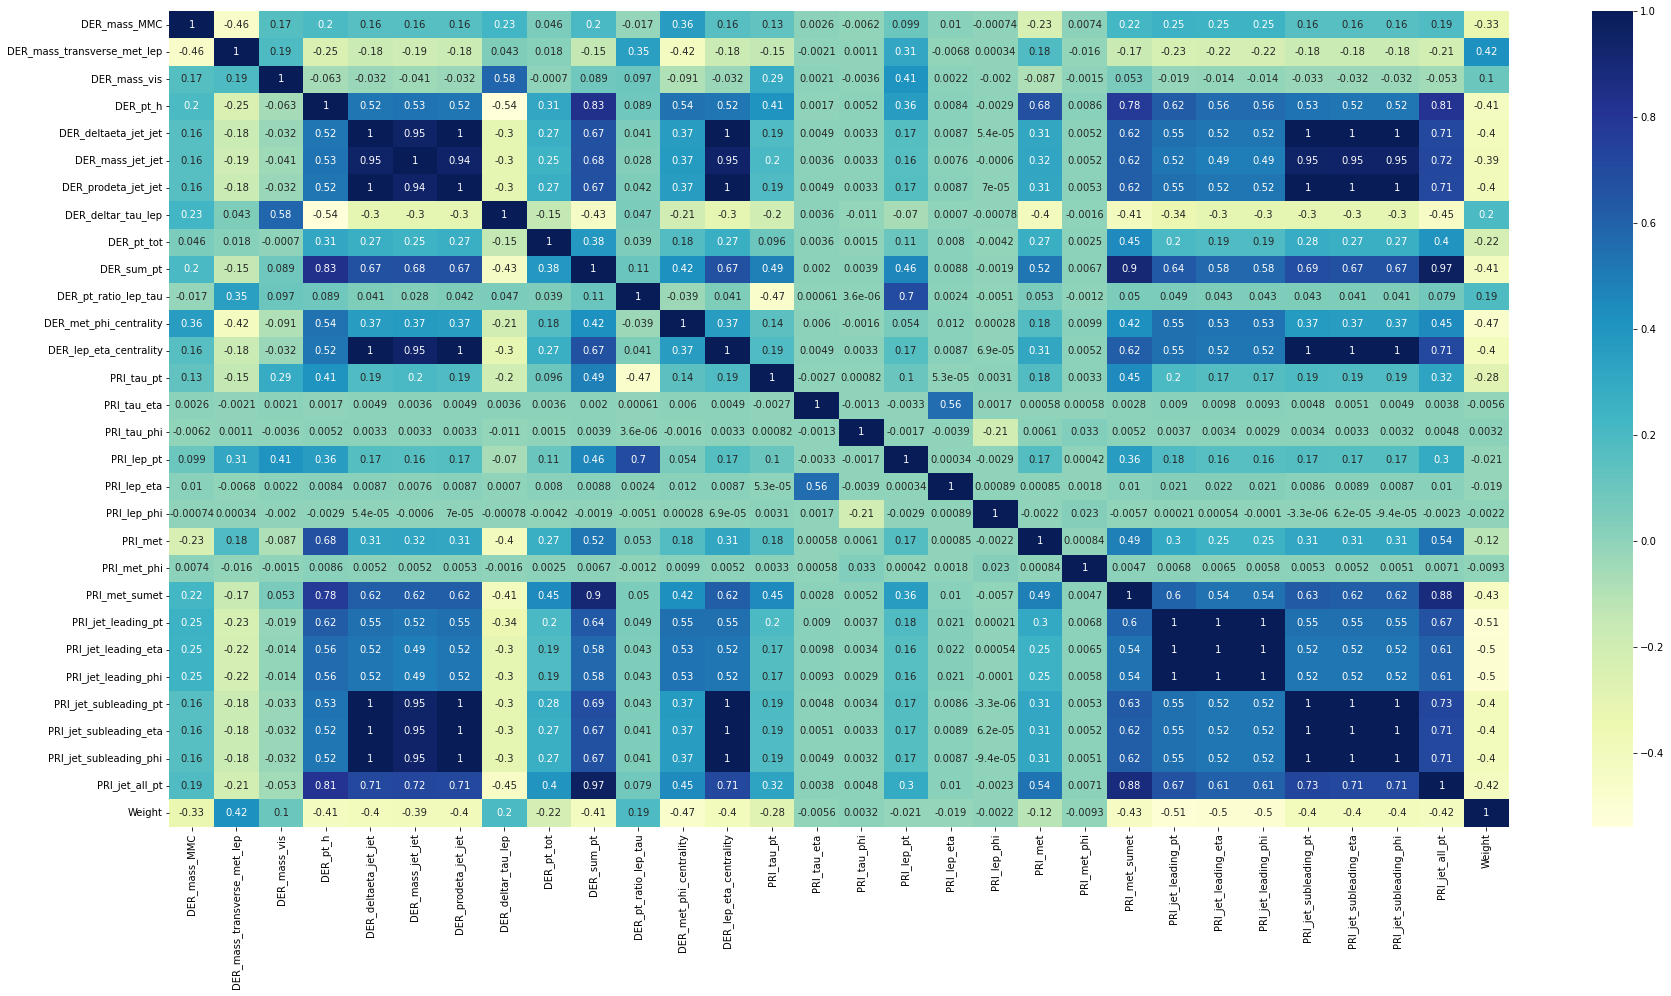

In [ ]:
plt.figure(figsize = (30,15))
sns.heatmap(data.select_dtypes(include = ['float']).corr(),annot = True,cmap = "YlGnBu")

**Observation: The following groups have shown extremely high positive correlation structure within themselves, i.e. any two features from a single group has extremely high correlation coefficient.**

1. DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_lep_eta_centrality, PRI_jet_subleading_pt, . PRI_jet_subleading_eta, PRI_jet_subleading_phi
2. DER_sum_pt, PRI_met_sumet, PRI_jet_all_pt
3. PRI_jet_leading_pt, PRI_jet_leading_eta, PRI_jet_leading_phi

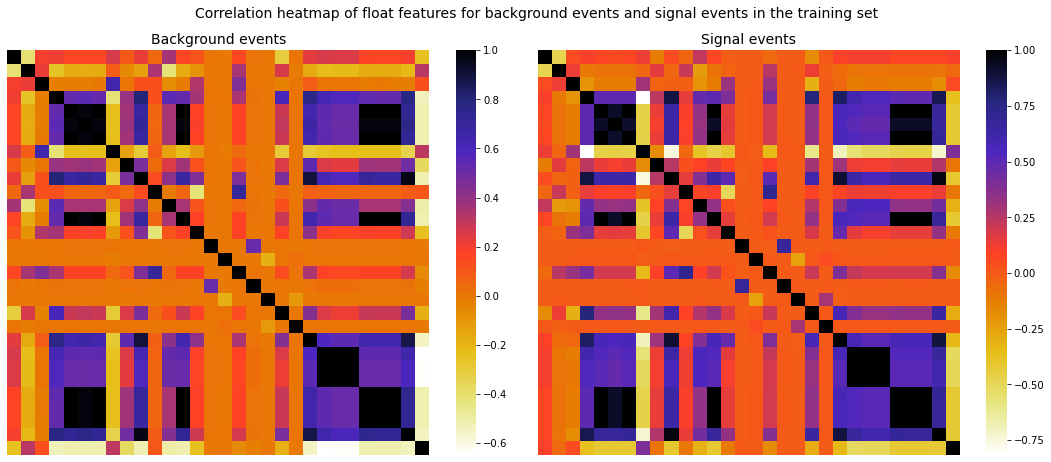

In [ ]:
# Correlation heatmap of float features for background events and signal events in the Data set
fig, ax = plt.subplots(1, 2, figsize = (15, 6.5), sharex = True, sharey = True)
sns.heatmap(data_b[float_col].corr(), annot = False, xticklabels = False, yticklabels = False, cmap = plt.cm.CMRmap_r, ax = ax[0])
sns.heatmap(data_s[float_col].corr(), annot = False, xticklabels = False, yticklabels = False, cmap = plt.cm.CMRmap_r, ax = ax[1])
ax[0].set_title("Background events", fontsize = 14)
ax[1].set_title("Signal events", fontsize = 14)
plt.suptitle("Correlation heatmap of float features for background events and signal events in the training set", fontsize = 14)
plt.tight_layout()
plt.show()

**Observation:** The two heatmaps are more or less similar, i.e. the overall correlation structure of the float features corresponding to the background events and the signal events in the dataset are very much alike.

## Bivariate Scatterplots

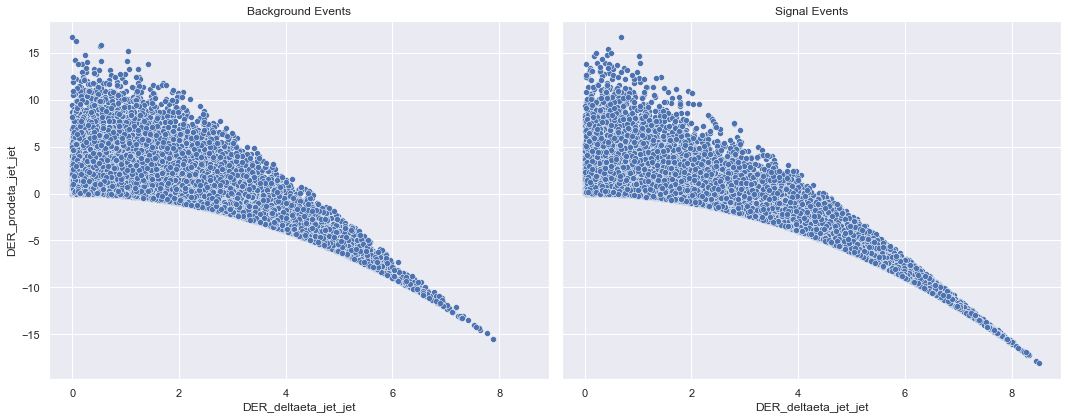

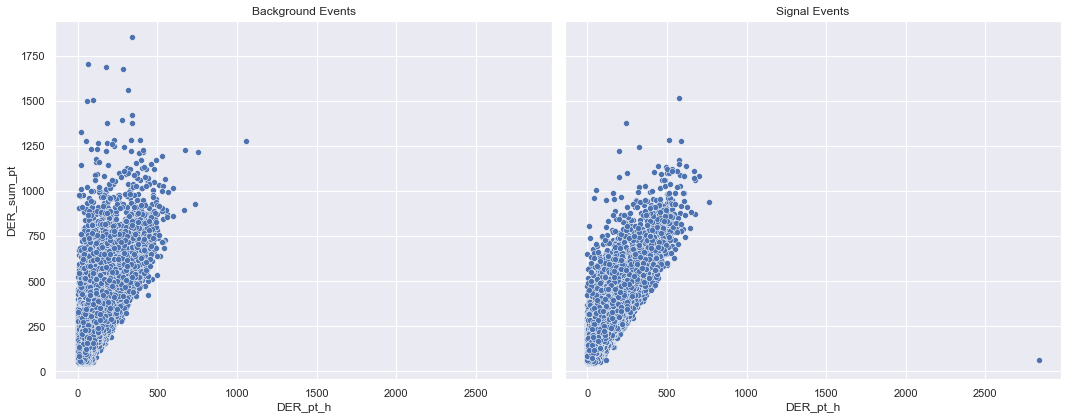

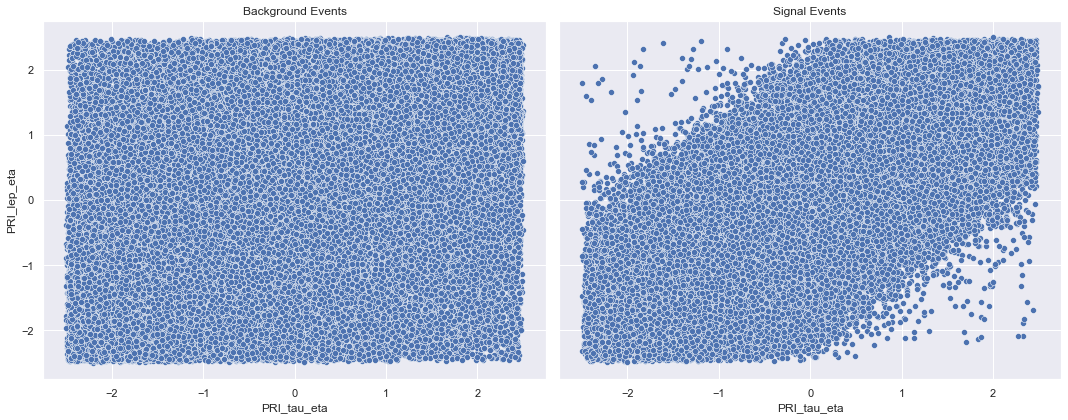

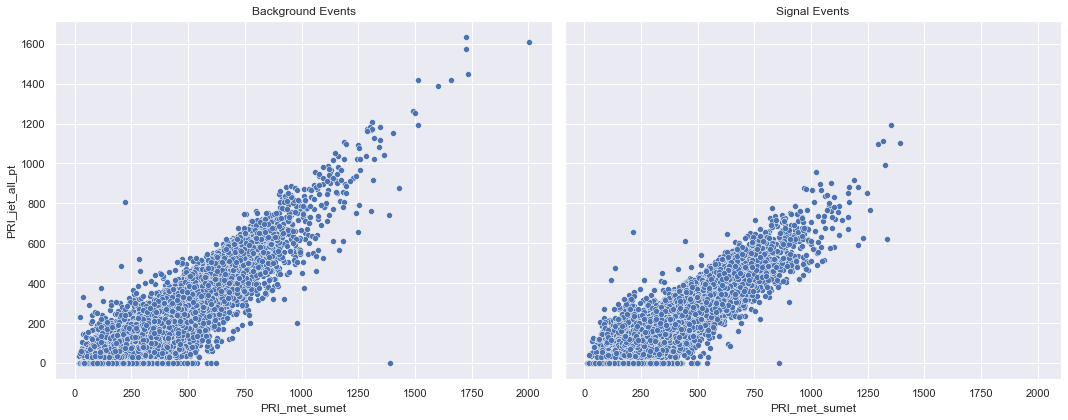

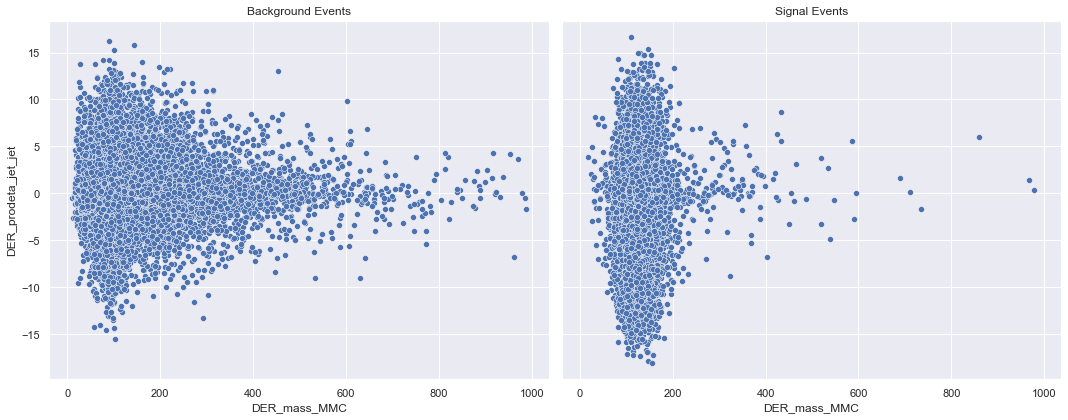

In [ ]:
#pairs selected
pairs = [
    ('DER_deltaeta_jet_jet', 'DER_mass_jet_jet'),
    ('DER_deltaeta_jet_jet','DER_prodeta_jet_jet'),
    ('DER_pt_h','DER_sum_pt'),
    ('PRI_tau_eta', 'PRI_lep_eta'),
    ('PRI_met_sumet', 'PRI_jet_all_pt'),
    ('PRI_jet_subleading_phi', 'PRI_met_sumet'),
    ('DER_mass_MMC', 'DER_prodeta_jet_jet')
        ]

for i in pairs:
    fig,ax = plt.subplots(1,2,figsize = (15,6),sharex = True,sharey = True)
    sns.scatterplot(data = data_b.replace(-999.0,np.nan),x = i[0],y = i[1],ax = ax[0])
    sns.scatterplot(data = data_s.replace(-999.00,np.nan),x = i[0],y = i[1],ax = ax[1])
    ax[0].set_title('Background Events')
    ax[1].set_title('Signal Events')
    plt.tight_layout()

plt.show()


## Data Preprocessing

In [42]:
label_dict_encoding = {'b':0,'s':1}
data['Label'] = data['Label'].replace(label_dict_encoding)

In [43]:
data['Label'].value_counts()

0    164333
1     85667
Name: Label, dtype: int64

In [44]:
new_data = data.copy()

In [45]:
new_data = new_data.drop(['EventId','Weight'],axis = 1)
new_data.shape

(250000, 31)

**We observed that many columns contains -999.000 values in large proportion.As per documentation of dataset,these variables are meaningless or cannot be computed,which is outside the normal range of all variables.The proportion of values is as follows:**

In [46]:
df_minus_999

Background Event  Signal Event  All Events
DER_mass_MMC                    0.756117      0.621033    0.709828
DER_deltaeta_jet_jet            0.756117      0.621033    0.709828
DER_mass_jet_jet                0.756117      0.621033    0.709828
DER_prodeta_jet_jet             0.756117      0.621033    0.709828
DER_lep_eta_centrality          0.756117      0.621033    0.709828
PRI_jet_leading_pt              0.756117      0.621033    0.709828
PRI_jet_leading_eta             0.756111      0.621033    0.709824
PRI_jet_leading_phi             0.452867      0.297571    0.399652
PRI_jet_subleading_pt           0.452867      0.297571    0.399652
PRI_jet_subleading_eta          0.452867      0.297571    0.399652
PRI_jet_subleading_phi          0.214680      0.033093    0.152456

**We suspect that these are the missing values which is fill with the constant value -999.000.So we are going to drop these columns from our dataset**

In [47]:
new_data = new_data.drop(index_999,axis = 1)
new_data.shape

(250000, 20)

**Furthur we analyze the correletaion between the variables and found out multicollinearity in our data.So lets drop the columns which causes multicollinearity problem in our data**

1. DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_lep_eta_centrality, PRI_jet_subleading_pt, . PRI_jet_subleading_eta, PRI_jet_subleading_phi
2. DER_sum_pt, PRI_met_sumet, PRI_jet_all_pt
3. PRI_jet_leading_pt, PRI_jet_leading_eta, PRI_jet_leading_phi

In [48]:
#DER_sum_pt, PRI_met_sumet, PRI_jet_all_pt

new_data = new_data.drop(['PRI_met_sumet','PRI_jet_all_pt'],axis = 1)

In [49]:
new_data.shape

(250000, 18)

## 5. Feature Engineering

In [50]:
enc_data = pd.get_dummies(data = new_data,columns = ['PRI_jet_num'],drop_first = True)

In [51]:
enc_data.head()

DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  DER_deltar_tau_lep  \
0                       51.655        97.827    27.980               3.064   
1                       68.768       103.235    48.146               3.473   
2                      162.172       125.953    35.635               3.148   
3                       81.417        80.943     0.414               3.310   
4                       16.915       134.805    16.405               3.891   

   DER_pt_tot  DER_sum_pt  DER_pt_ratio_lep_tau  DER_met_phi_centrality  \
0      41.928     197.760                 1.582                   1.396   
1       2.078     125.157                 0.879                   1.414   
2       9.336     197.814                 3.776                   1.414   
3       0.414      75.968                 2.354                  -1.285   
4      16.405      57.983                 1.056                  -1.385   

   PRI_tau_pt  PRI_tau_eta  PRI_tau_phi  PRI_lep_pt  PRI_lep_eta  PRI_lep_phi  \
0      32.638        1.017        0.381      51.626        2.273       -2.414   
1      42.014        2.039       -3.011      36.918        0.501        0.103   
2      32.154       -0.705       -2.093     121.409       -0.953        1.052   
3      22.647       -1.655        0.010      53.321       -0.522       -3.100   
4      28.209       -2.197       -2.231      29.774        0.798        1.569   

   PRI_met  PRI_met_phi  Label  PRI_jet_num_1  PRI_jet_num_2  PRI_jet_num_3  
0   16.824       -0.277      1              0              1              0  
1   44.704       -1.916      0              1              0              0  
2   54.283       -2.186      0              1              0              0  
3   31.082        0.060      0              0              0              0  
4    2.723       -0.871      0              0              0              0

**We note the following observation from the analysis of skewness :**

* Columns with Extreme Positive skewness : ['DER_mass_MMC', 'DER_mass_vis', 'DER_pt_tot', 'PRI_tau_pt', 'PRI_lep_pt', 'PRI_met', 'PRI_jet_subleading_pt']

* Column with High Positive Skewness :  ['DER_mass_transverse_met_lep', 'DER_pt_h', 'DER_mass_jet_jet', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'PRI_met_sumet', 'PRI_jet_leading_pt', 'PRI_jet_all_pt']

* Column with Moderate Positive Skewness :  ['DER_deltaeta_jet_jet', 'Weight']

In [52]:
col_transform = list(column_with_extreme_positive_skewness) + list(column_with_high_positive_skewness) + list(column_with_moderate_positive_skewness)

In [53]:
col_transform = col_transform
col_transform = [col for col in enc_data.columns if col in col_transform]
col_transform

['DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'PRI_tau_pt',
 'PRI_lep_pt',
 'PRI_met']

In [54]:
enc_data.head()

DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  DER_deltar_tau_lep  \
0                       51.655        97.827    27.980               3.064   
1                       68.768       103.235    48.146               3.473   
2                      162.172       125.953    35.635               3.148   
3                       81.417        80.943     0.414               3.310   
4                       16.915       134.805    16.405               3.891   

   DER_pt_tot  DER_sum_pt  DER_pt_ratio_lep_tau  DER_met_phi_centrality  \
0      41.928     197.760                 1.582                   1.396   
1       2.078     125.157                 0.879                   1.414   
2       9.336     197.814                 3.776                   1.414   
3       0.414      75.968                 2.354                  -1.285   
4      16.405      57.983                 1.056                  -1.385   

   PRI_tau_pt  PRI_tau_eta  PRI_tau_phi  PRI_lep_pt  PRI_lep_eta  PRI_lep_phi  \
0      32.638        1.017        0.381      51.626        2.273       -2.414   
1      42.014        2.039       -3.011      36.918        0.501        0.103   
2      32.154       -0.705       -2.093     121.409       -0.953        1.052   
3      22.647       -1.655        0.010      53.321       -0.522       -3.100   
4      28.209       -2.197       -2.231      29.774        0.798        1.569   

   PRI_met  PRI_met_phi  Label  PRI_jet_num_1  PRI_jet_num_2  PRI_jet_num_3  
0   16.824       -0.277      1              0              1              0  
1   44.704       -1.916      0              1              0              0  
2   54.283       -2.186      0              1              0              0  
3   31.082        0.060      0              0              0              0  
4    2.723       -0.871      0              0              0              0

In [55]:
X = enc_data.drop(['Label'],axis = 1)
y = enc_data['Label']

In [56]:
X.head()

DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  DER_deltar_tau_lep  \
0                       51.655        97.827    27.980               3.064   
1                       68.768       103.235    48.146               3.473   
2                      162.172       125.953    35.635               3.148   
3                       81.417        80.943     0.414               3.310   
4                       16.915       134.805    16.405               3.891   

   DER_pt_tot  DER_sum_pt  DER_pt_ratio_lep_tau  DER_met_phi_centrality  \
0      41.928     197.760                 1.582                   1.396   
1       2.078     125.157                 0.879                   1.414   
2       9.336     197.814                 3.776                   1.414   
3       0.414      75.968                 2.354                  -1.285   
4      16.405      57.983                 1.056                  -1.385   

   PRI_tau_pt  PRI_tau_eta  PRI_tau_phi  PRI_lep_pt  PRI_lep_eta  PRI_lep_phi  \
0      32.638        1.017        0.381      51.626        2.273       -2.414   
1      42.014        2.039       -3.011      36.918        0.501        0.103   
2      32.154       -0.705       -2.093     121.409       -0.953        1.052   
3      22.647       -1.655        0.010      53.321       -0.522       -3.100   
4      28.209       -2.197       -2.231      29.774        0.798        1.569   

   PRI_met  PRI_met_phi  PRI_jet_num_1  PRI_jet_num_2  PRI_jet_num_3  
0   16.824       -0.277              0              1              0  
1   44.704       -1.916              1              0              0  
2   54.283       -2.186              1              0              0  
3   31.082        0.060              0              0              0  
4    2.723       -0.871              0              0              0

In [57]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

## Imbalanced Data Treatment

In [58]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X, y)

In [59]:
print('Before Imbalanced Treatment : ')
print(y.value_counts())
print('--'*20)
print('After Imbalanced Treatment : ')
print(y_res.value_counts())



Before Imbalanced Treatment : 
0    164333
1     85667
Name: Label, dtype: int64
----------------------------------------
After Imbalanced Treatment : 
1    164333
0    164333
Name: Label, dtype: int64


In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.2,stratify = y_res,random_state = 840)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(262932, 19) (262932,) (65734, 19) (65734,)


In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

transformer = ColumnTransformer(transformers=[
    ("PowerTransformer", PowerTransformer(method='yeo-johnson'), col_transform)
], remainder="passthrough")

In [62]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [ ]:
"""lambda_df = pd.DataFrame({'Features':enc_data.columns[:-3],'yeo_jhonson_lambda':transformer.lambdas_})
lambda_df"""

"lambda_df = pd.DataFrame({'Features':enc_data.columns[:-3],'yeo_jhonson_lambda':transformer.lambdas_})\nlambda_df"

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,accuracy_score,classification_report,roc_auc_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [64]:
def displayConfusionMatrix(y_true, y_pred,dataset):
    plt.figure(figsize = (12,8))
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=["Background","Signal"],
    )

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset +" Dataset -- F1 Score: " + str(f1_score.round(2)))
    plt.grid('off')
    plt.show()

In [66]:
df_eval = pd.DataFrame()
train_acc = []
test_acc = []
variance = []
model_list = []
roc_auc_train = []
roc_auc_test =[]
def model_building(model,model_name):

    model.fit(X_train_transformed,y_train)
    y_pred_train = model.predict(X_train_transformed)
    y_pred_test = model.predict(X_test_transformed)

    train_accuracy = accuracy_score(y_train,y_pred_train)
    test_accuracy = accuracy_score(y_test,y_pred_test)
    roc_train = roc_auc_score(y_train,y_pred_train)
    roc_test = roc_auc_score(y_test,y_pred_test)

    print(f"Train Accuracy of {model_name} is {train_accuracy}")
    print(f"ROC-AUC Train Accuracy of {model_name} is {roc_train}")
    print('=='*50)
    print(f"Test Accuracy of {model_name} is {test_accuracy}")
    print(f"ROC-AUC Test Accuracy of {model_name} is {roc_test}")
    print('=='*50)
    print('Classification Report Of Train Data ')
    print('=='*50)
    print(classification_report(y_train,y_pred_train))
    displayConfusionMatrix(y_train,y_pred_train,'Train')
    print('=='*50)
    print('Classification Report Of Test Data ')
    print('=='*50)
    print(classification_report(y_test,y_pred_test))
    displayConfusionMatrix(y_test,y_pred_test,'Test')

    model_list.append(model_name)

    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

    roc_auc_train.append(roc_train)
    roc_auc_test.append(roc_test)

    variance_train_test = np.round(np.abs((train_accuracy)*100 - (test_accuracy)*100),2)
    variance.append(variance_train_test)







## Logistic Regression

Train Accuracy of Logistic_Regression is 0.7331058981029316
ROC-AUC Train Accuracy of Logistic_Regression is 0.7331058981029317
Test Accuracy of Logistic_Regression is 0.7351598868165637
ROC-AUC Test Accuracy of Logistic_Regression is 0.7351598868165636
Classification Report Of Train Data 
              precision    recall  f1-score   support

           0       0.74      0.71      0.73    131466
           1       0.72      0.75      0.74    131466

    accuracy                           0.73    262932
   macro avg       0.73      0.73      0.73    262932
weighted avg       0.73      0.73      0.73    262932



<Figure size 1200x800 with 0 Axes>

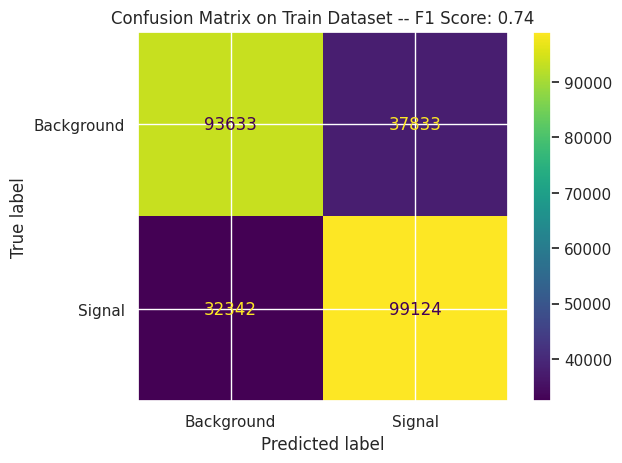

Classification Report Of Test Data 
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     32867
           1       0.73      0.75      0.74     32867

    accuracy                           0.74     65734
   macro avg       0.74      0.74      0.74     65734
weighted avg       0.74      0.74      0.74     65734



<Figure size 1200x800 with 0 Axes>

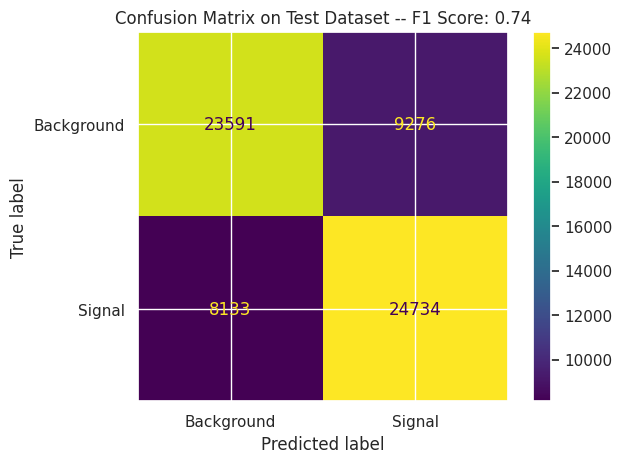

In [67]:
lr = LogisticRegression()
model_building(lr,'Logistic_Regression')

## Decision Tree

In [74]:
dt_feature = DecisionTreeClassifier(criterion = "entropy")
dt_feature.fit(X_train_transformed,y_train)
pd.DataFrame(data = dt_feature.feature_importances_,index = X.columns,columns = ['Feature Importances'])

Feature Importances
DER_mass_transverse_met_lep             0.172601
DER_mass_vis                            0.154527
DER_pt_h                                0.035469
DER_deltar_tau_lep                      0.046695
DER_pt_tot                              0.038851
DER_sum_pt                              0.025837
DER_pt_ratio_lep_tau                    0.072421
DER_met_phi_centrality                  0.031037
PRI_tau_pt                              0.077778
PRI_tau_eta                             0.071497
PRI_tau_phi                             0.073226
PRI_lep_pt                              0.038390
PRI_lep_eta                             0.035637
PRI_lep_phi                             0.046391
PRI_met                                 0.034997
PRI_met_phi                             0.033743
PRI_jet_num_1                           0.002894
PRI_jet_num_2                           0.002858
PRI_jet_num_3                           0.005149

In [75]:
dt = DecisionTreeClassifier(criterion = "entropy",max_depth = 11)
model_building(dt,'Decision_Tree')

Train Accuracy of Decision_Tree is 0.825840901830131
ROC-AUC Train Accuracy of Decision_Tree is 0.8258409018301309
Test Accuracy of Decision_Tree is 0.8057930446952871
ROC-AUC Test Accuracy of Decision_Tree is 0.805793044695287
Classification Report Of Train Data 
              precision    recall  f1-score   support

           0       0.84      0.80      0.82    131466
           1       0.81      0.85      0.83    131466

    accuracy                           0.83    262932
   macro avg       0.83      0.83      0.83    262932
weighted avg       0.83      0.83      0.83    262932



<Figure size 1200x800 with 0 Axes>

Classification Report Of Test Data 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     32867
           1       0.79      0.83      0.81     32867

    accuracy                           0.81     65734
   macro avg       0.81      0.81      0.81     65734
weighted avg       0.81      0.81      0.81     65734



<Figure size 1200x800 with 0 Axes>

## Random Forest

Train Accuracy of Random_Forest is 0.8355582431959594
ROC-AUC Train Accuracy of Random_Forest is 0.8355582431959594
Test Accuracy of Random_Forest is 0.8184805427936837
ROC-AUC Test Accuracy of Random_Forest is 0.8184805427936837
Classification Report Of Train Data 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83    131466
           1       0.82      0.86      0.84    131466

    accuracy                           0.84    262932
   macro avg       0.84      0.84      0.84    262932
weighted avg       0.84      0.84      0.84    262932



<Figure size 1200x800 with 0 Axes>

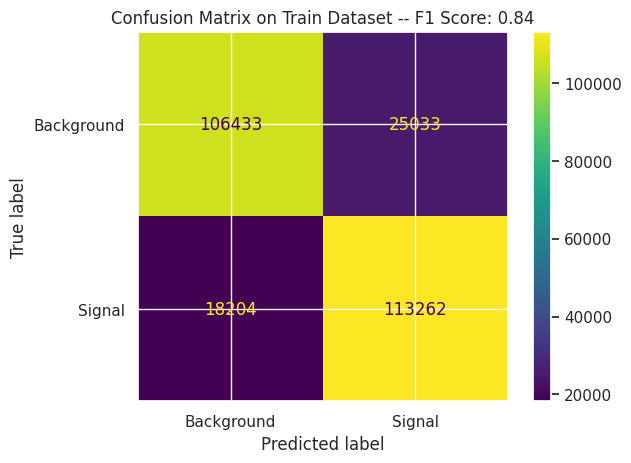

Classification Report Of Test Data 
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     32867
           1       0.80      0.85      0.82     32867

    accuracy                           0.82     65734
   macro avg       0.82      0.82      0.82     65734
weighted avg       0.82      0.82      0.82     65734



<Figure size 1200x800 with 0 Axes>

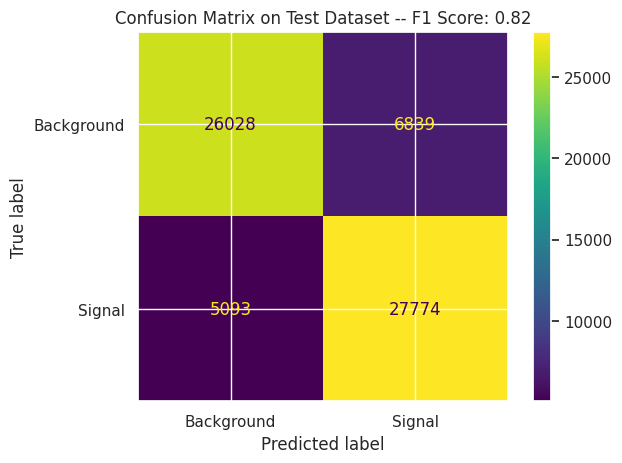

In [77]:
rf = RandomForestClassifier(n_estimators = 300,max_depth = 11,min_samples_split = 11)
model_building(rf,'Random_Forest')

## Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Train Accuracy of Bagging_Classifier is 0.8416548765460271
ROC-AUC Train Accuracy of Bagging_Classifier is 0.8416548765460272
Test Accuracy of Bagging_Classifier is 0.8221620470380625
ROC-AUC Test Accuracy of Bagging_Classifier is 0.8221620470380625
Classification Report Of Train Data 
              precision    recall  f1-score   support

           0       0.86      0.82      0.84    131466
           1       0.83      0.86      0.84    131466

    accuracy                           0.84    262932
   macro avg       0.84      0.84      0.84    262932
weighted avg       0.84      0.84      0.84    262932



<Figure size 1200x800 with 0 Axes>

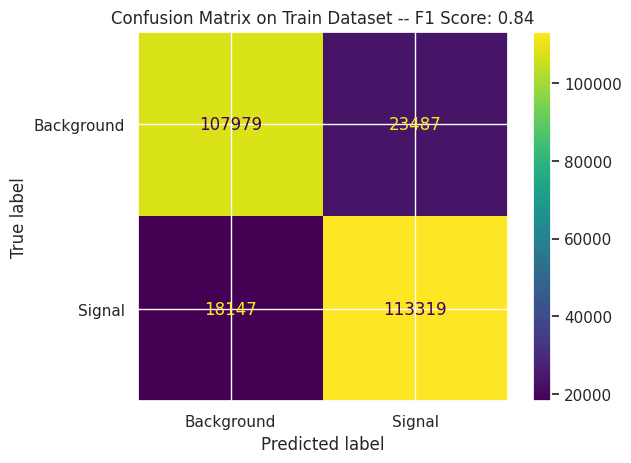

Classification Report Of Test Data 
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     32867
           1       0.81      0.84      0.83     32867

    accuracy                           0.82     65734
   macro avg       0.82      0.82      0.82     65734
weighted avg       0.82      0.82      0.82     65734



<Figure size 1200x800 with 0 Axes>

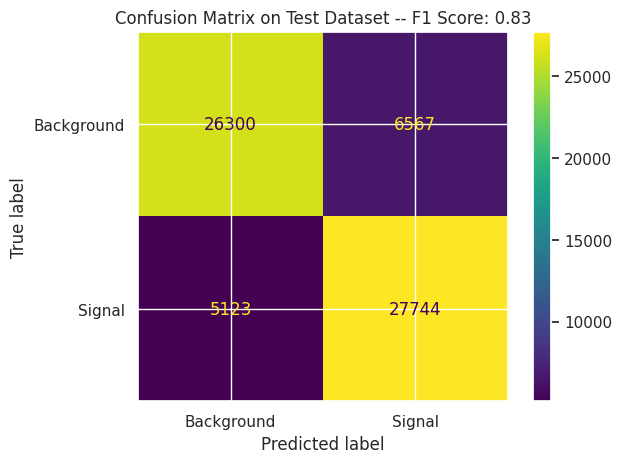

In [78]:
bag = BaggingClassifier(base_estimator = dt,n_estimators = 100)
model_building(bag,'Bagging_Classifier')

## Gradient Boosting

Train Accuracy of Gradient Boosting Classifier is 0.8528935238008306
ROC-AUC Train Accuracy of Gradient Boosting Classifier is 0.8528935238008307
Test Accuracy of Gradient Boosting Classifier is 0.8419082970760946
ROC-AUC Test Accuracy of Gradient Boosting Classifier is 0.8419082970760945
Classification Report Of Train Data 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85    131466
           1       0.85      0.86      0.85    131466

    accuracy                           0.85    262932
   macro avg       0.85      0.85      0.85    262932
weighted avg       0.85      0.85      0.85    262932



<Figure size 1200x800 with 0 Axes>

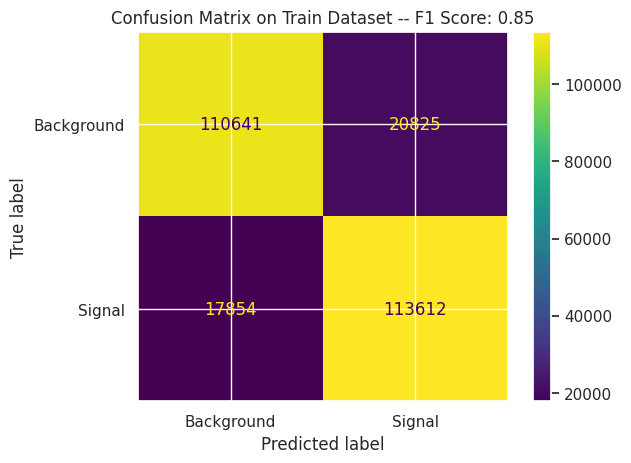

Classification Report Of Test Data 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     32867
           1       0.83      0.86      0.84     32867

    accuracy                           0.84     65734
   macro avg       0.84      0.84      0.84     65734
weighted avg       0.84      0.84      0.84     65734



<Figure size 1200x800 with 0 Axes>

In [79]:
gbl = GradientBoostingClassifier(learning_rate =0.1,n_estimators = 300,subsample = 0.7,max_depth = 5)
model_building(gbl,'Gradient Boosting Classifier')

## Stacking Classifier

In [81]:
estimators = []
estimators.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=13) ))
estimators.append(('Bagging Classifier', BaggingClassifier(random_state = 13)))
estimators.append(('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=13) ))
estimators.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = "entropy",max_depth = 11)))
estimators.append(('XGB', XGBClassifier(random_state=13) ))
XGB =  XGBClassifier(random_state=13)

Train Accuracy of StackingClassifier is 0.9501544125477309
ROC-AUC Train Accuracy of StackingClassifier is 0.9501544125477309
Test Accuracy of StackingClassifier is 0.8529375969817751
ROC-AUC Test Accuracy of StackingClassifier is 0.852937596981775
Classification Report Of Train Data 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95    131466
           1       0.93      0.97      0.95    131466

    accuracy                           0.95    262932
   macro avg       0.95      0.95      0.95    262932
weighted avg       0.95      0.95      0.95    262932



<Figure size 1200x800 with 0 Axes>

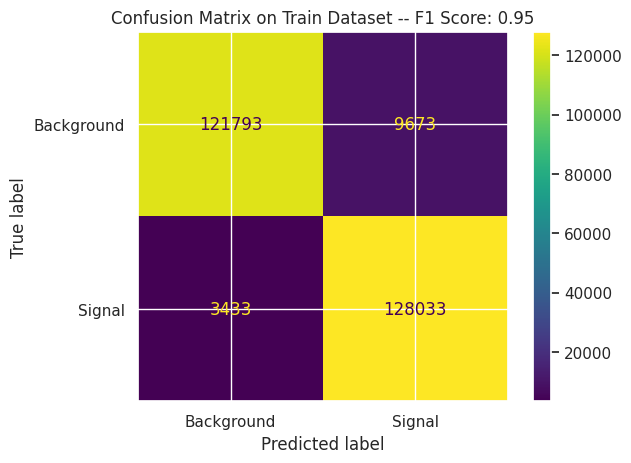

Classification Report Of Test Data 
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     32867
           1       0.85      0.86      0.85     32867

    accuracy                           0.85     65734
   macro avg       0.85      0.85      0.85     65734
weighted avg       0.85      0.85      0.85     65734



<Figure size 1200x800 with 0 Axes>

In [82]:
SC = StackingClassifier(estimators=estimators,final_estimator=XGB,cv=6)
model_building(SC,'StackingClassifier')

## Model Comparision

In [103]:
df_eval['train_accuracy'] = train_acc
df_eval['test_accuracy'] = test_acc
df_eval['roc_auc_train'] = roc_auc_train
df_eval['roc_auc_test'] = roc_auc_test
df_eval['variance'] = variance
df_eval.index = model_list
df_eval

train_accuracy  test_accuracy  roc_auc_train  \
Logistic_Regression                 0.733106       0.735160       0.733106   
Decision_Tree                       0.825841       0.805793       0.825841   
Random_Forest                       0.835558       0.818481       0.835558   
Bagging_Classifier                  0.841655       0.822162       0.841655   
Gradient Boosting Classifier        0.852894       0.841908       0.852894   
StackingClassifier                  0.950154       0.852938       0.950154   

                              roc_auc_test  variance  
Logistic_Regression               0.735160      0.21  
Decision_Tree                     0.805793      2.00  
Random_Forest                     0.818481      1.71  
Bagging_Classifier                0.822162      1.95  
Gradient Boosting Classifier      0.841908      1.10  
StackingClassifier                0.852938      9.72

In [115]:
import plotly.graph_objects as go

# Create bar plots
fig = go.Figure()

# Add trace for Value1
fig.add_trace(go.Bar(
    x=model_list,
    y=df_eval['train_accuracy'],
    name='train_accuracy',
    marker_color='blue'
))

# Add trace for Value2
fig.add_trace(go.Bar(
    x=model_list,
    y=df_eval['test_accuracy'],
    name='test_accuracy',
    marker_color='orange'
))

# Update layout
fig.update_layout(
    title='Comparision of Models',
    xaxis=dict(title='Model Name'),
    yaxis=dict(title='Accuracy'),
    barmode='group'
)

# Show plot
fig.show()


## Deep Learning Approach

In [83]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential

In [84]:
model = Sequential()
model.add(keras.layers.Dense(128,activation = 'relu',input_dim = X_train.shape[1]))
model.add(keras.layers.Dense(64,activation = 'relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(32,activation = 'relu'))
model.add(keras.layers.Dense(16,activation = 'relu'))
model.add(keras.layers.Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,441
Trainable params: 13,441
Non-traina

In [88]:
metrics = [
    keras.metrics.BinaryAccuracy(name="accuracy"),
    keras.metrics.AUC(name="auc", curve="ROC"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Precision(name="recall")
]
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),loss='binary_crossentropy', metrics=metrics )

In [125]:
history = model.fit(X_train_transformed,y_train,epochs = 15,validation_data = (X_test_transformed,y_test))

Epoch 1/15
8217/8217 [==============================] - 37s 5ms/step - loss: 0.3319 - accuracy: 0.8513 - auc: 0.9317 - precision: 0.8518 - recall: 0.8518 - val_loss: 0.3400 - val_accuracy: 0.8469 - val_auc: 0.9285 - val_precision: 0.8385 - val_recall: 0.8385
Epoch 2/15
8217/8217 [==============================] - 48s 6ms/step - loss: 0.3312 - accuracy: 0.8520 - auc: 0.9320 - precision: 0.8523 - recall: 0.8523 - val_loss: 0.3400 - val_accuracy: 0.8451 - val_auc: 0.9283 - val_precision: 0.8346 - val_recall: 0.8346
Epoch 3/15
8217/8217 [==============================] - 45s 6ms/step - loss: 0.3309 - accuracy: 0.8519 - auc: 0.9321 - precision: 0.8529 - recall: 0.8529 - val_loss: 0.3380 - val_accuracy: 0.8476 - val_auc: 0.9293 - val_precision: 0.8323 - val_recall: 0.8323
Epoch 4/15
8217/8217 [==============================] - 27s 3ms/step - loss: 0.3308 - accuracy: 0.8528 - auc: 0.9322 - precision: 0.8538 - recall: 0.8538 - val_loss: 0.3372 - val_accuracy: 0.8478 - val_auc: 0.9296 - val_pre

In [126]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
auc = history.history['auc']
val_auc = history.history['val_auc']
precision = history.history['precision']
val_precision = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']

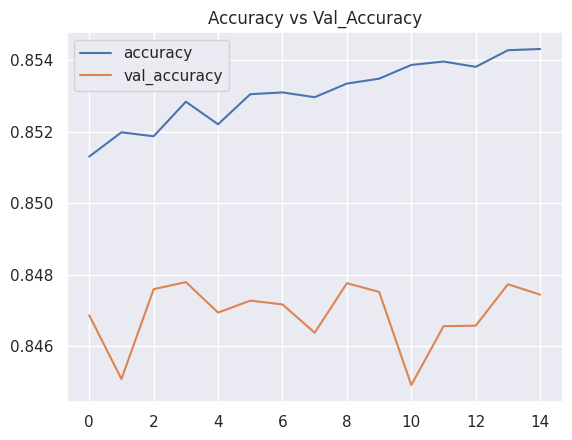

In [129]:
plt.plot(accuracy,label = 'accuracy')
plt.plot(val_accuracy,label = 'val_accuracy')
plt.title('Accuracy vs Val_Accuracy')
plt.legend()
plt.grid('off')
plt.show()

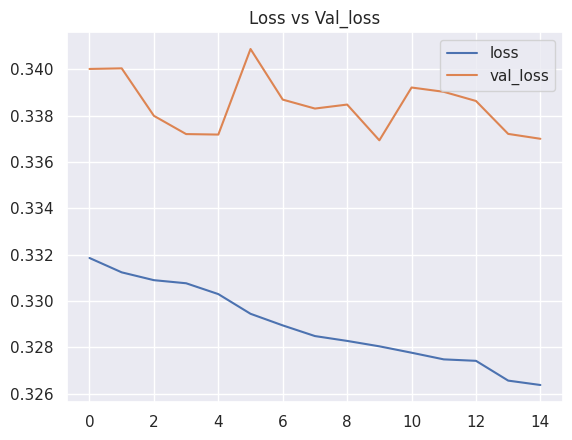

In [130]:
plt.plot(loss,label = 'loss')
plt.plot(val_loss,label = 'val_loss')
plt.title('Loss vs Val_loss')
plt.legend()
plt.show()

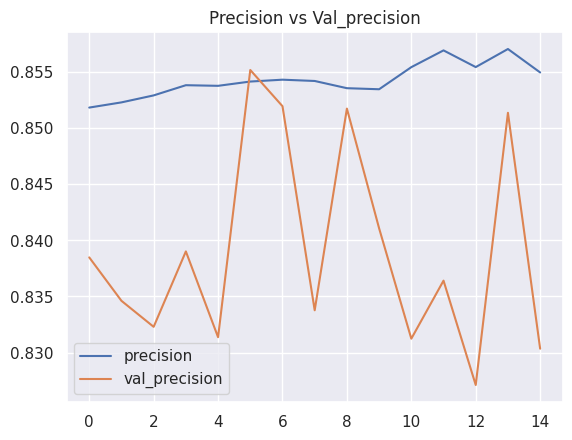

In [131]:
plt.plot(precision,label = 'precision')
plt.plot(val_precision,label = 'val_precision')
plt.title('Precision vs Val_precision')
plt.legend()
plt.show()

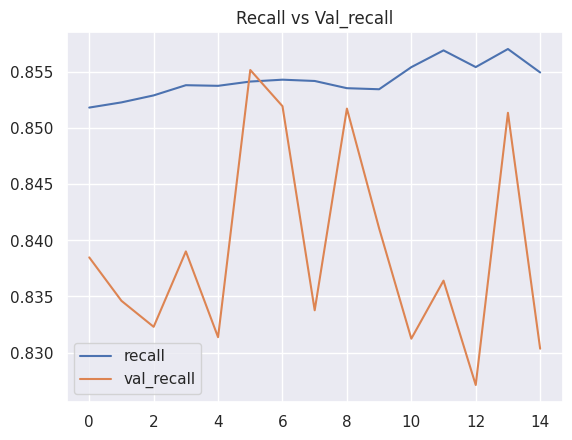

In [132]:
plt.plot(precision,label = 'recall')
plt.plot(val_precision,label = 'val_recall')
plt.title('Recall vs Val_recall')
plt.legend()
plt.show()

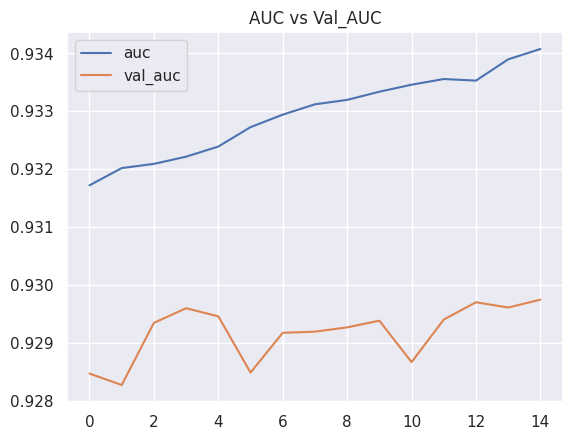

In [133]:
plt.plot(auc,label = 'auc')
plt.plot(val_auc,label = 'val_auc')
plt.title('AUC vs Val_AUC')
plt.legend()
plt.show()

## Conclusion

In [134]:
df_eval

train_accuracy  test_accuracy  roc_auc_train  \
Logistic_Regression                 0.733106       0.735160       0.733106   
Decision_Tree                       0.825841       0.805793       0.825841   
Random_Forest                       0.835558       0.818481       0.835558   
Bagging_Classifier                  0.841655       0.822162       0.841655   
Gradient Boosting Classifier        0.852894       0.841908       0.852894   
StackingClassifier                  0.950154       0.852938       0.950154   

                              roc_auc_test  variance  
Logistic_Regression               0.735160      0.21  
Decision_Tree                     0.805793      2.00  
Random_Forest                     0.818481      1.71  
Bagging_Classifier                0.822162      1.95  
Gradient Boosting Classifier      0.841908      1.10  
StackingClassifier                0.852938      9.72

### Observation of the Model Building

1. **All the models perform well and achieve accuracy above 80% both in training and testing except Logistic Regression Model.**

2. **Overall we can see the variance is mininum even less than 2 for all models except Stacking Classifier which has maximum Variance of 9.**
3. **Stacking Classifier is performing well on training set but performing moderate on test set with variance of 9.**

4. **With max_depth = 5 and n_estimators = 300 Gradient Boosting Classifier tend to be much more accurate than other models.**

5. **We Build the model using deep neural netowk with loss as Binary Cross Entropy and activation as relu and Sigmoid.We achieved the great train accuracy as 86% and test accuracy as 85%.**

6. **Hence We reached to the conclusion that Gradient Boosting Classifier and Deep Neural Network model is the best fit model for Particle Physics Event Detection Classification Problem.**

## References 

* Research Paper - https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf
* ATLAS -https://www.home.cern/science/experiments/atlas

In [2]:
import pandas as pd
df = pd.DataFrame({'State':['KN','KN','AP','AP'],'V':[2003,2004,2003,2004],'P':[1,2,3,4]})

In [3]:
df

State     V  P
0    KN  2003  1
1    KN  2004  2
2    AP  2003  3
3    AP  2004  4

In [5]:
pd.MultiIndex.from_frame(df[])

ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements